<a href="https://colab.research.google.com/github/deborahmasibo/Amazon-Product-Reviews-Sentiment-Analysis/blob/main/The_Bold_and_The_Beautiful.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

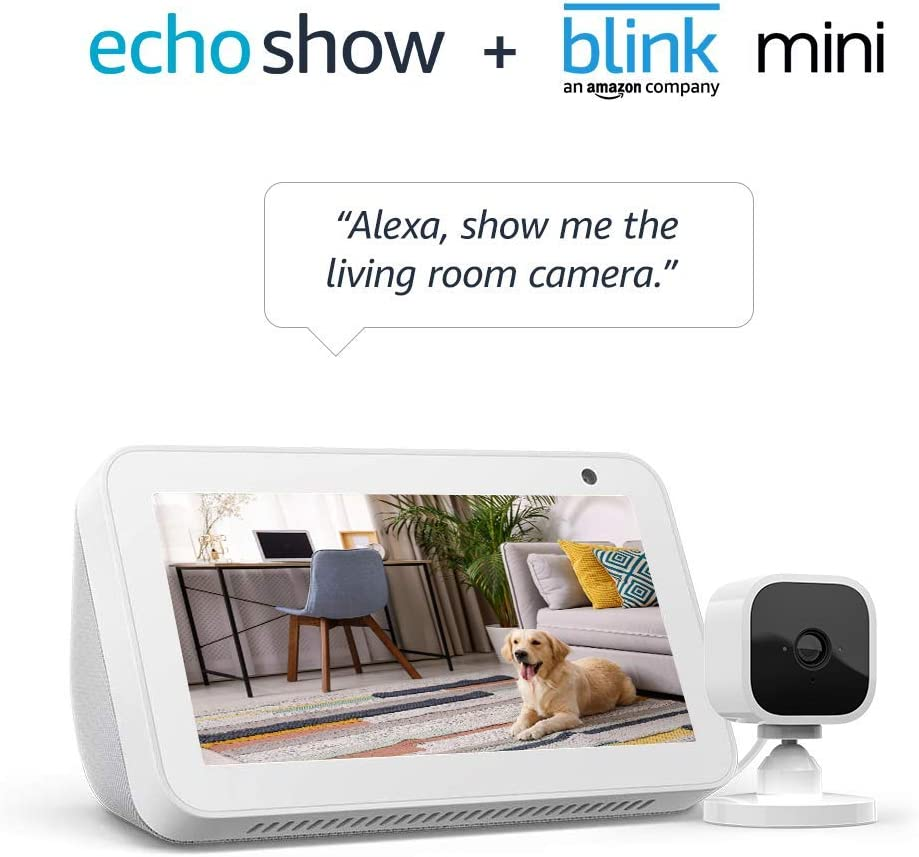

**PRODUCT REVIEW ANALYSIS**

 **a.)  Defining the Research Question**

To develop a Amazon product model that will rate the product ranks based on the  customers feedback.

**b.) Understanding the Context**

Amazon is a multinational e-commerce platform technology company based in America that specializes in  e-commerce, cloud computing, digital streaming, and artificial intelligence. Amazon is a vast internet-based company which offers a variety of products such as beauty, apparel, clothing, software, mobile appliances, electronics, groceries luggage, entertainment such as books, music, movies, home use and improvement goods among many other goods. Products in the beauty and apparel niche are widely bought by customers online, as it is a main preference for customers to buy these specific products through the online method using Amazon.com services. The company, which sells numerous products online, is the world’s largest online retailer, web service provider and cloud computing service whose headquarters are found in Seattle, Washington. It is one of the information technology Big Five companies along with Microsoft, Meta, Apple and Alphabet.Amazon is one of the world’s most valuable, leading brands in digital innovation.

The goods Amazon sells are sold either directly over the Internet or as the middleman between other retailers and its millions of customers. One of the company’s best products is Amazon customer reviews; which span over a period from 1995 till current, giving an overview of the customers’ expressions and opinions of their different experiences using products purchased over the Amazon.com website. These reviews are a viable source of information for use in the data science and machine learning fields for data scientists.Reviews in the beauty and apparel industry are available which can be made of use to conduct a thorough analysis to provide critical problem-solving as well as extract useful insights and make recommendations to the company.

**c.) Metrics of success**

Our study will be considered successful if we are able to meet the objectives below:

#General Objective

To recommend to Amazon the best products to stock in order to meet the customer's taste and needs.

#Specific Objectives

1.To identify and analyze customer opinion on available products.

2.To develop a system that seeks to forward customers feedback to the brand and predict customer sentiments.

3.To categorize the products’ reviews

Research questions

1.What are the customers/audience opinion on available products?

2.What are the most popular products and which brands’ customers are more likely to return?

3.What are the best products to stock in order to meet the customers' needs and taste?


**d.) Recording the Experimental Design**

1.Data Understanding

2. Data Relevance

3. Understand the context 

4. Metrics of success

4. Data Preparation

5. Perform Exploratory Data Analysis

6. Implementing the solution

7. Challenging the solution

8. Conclusion

9. Follow up questions


**e.) Data Relevance**

We shall be using the datasets below:


*   Reviews (https://nijianmo.github.io/amazon/index.html)
*   Product Metadata (https://nijianmo.github.io/amazon/index.html)
*   Ratings (https://nijianmo.github.io/amazon/index.html)

In [ ]:
# Redirect to google drive to help us not upload the datasets everytime we want to load our colab notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import libraries

In [ ]:
# Used in data manipulation
import pandas as pd
# Provides objects for multidimension arrays
import numpy as np
# Provides  function for creating and removing a directory, fectching its contents ,changing and identifying the current directory.
import os
# Used in visualization
import matplotlib.pyplot as plt
# Used for data visualization and exploratory data analysis
import seaborn as sns

#-------------------------------------ABSA-------------------------------
import spacy
import ast
from wordcloud import WordCloud,  ImageColorGenerator
from PIL import Image
#----------------------------XGBOOST--------------------------------------
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
# XGBOOST
import xgboost as xgb
# Oversampling
from imblearn.over_sampling import SMOTE

# ----------------------------BERT Model----------------------------------
import transformers
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

#-----------Fine-Tuning BERT Model----------------
# Customize training and feature complete training
from transformers import TrainingArguments, Trainer 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Evaluation metric library
from evaluate import load
# Configuration class for models
from transformers import AutoConfig
from warnings import filterwarnings

# Adds an entry into the specifications of the warning filter
filterwarnings('ignore')


In [ ]:
# Accessing working directory

os.chdir('/content/drive/Shared drives/Bold and beautiful')

In [ ]:
#import load_data.py to read data from file

import json_data
from json_data import data

In [ ]:
#import rating.py to read data from file

import csv_data
from csv_data import Data

# Dataset loading

## Amazon Fashion dataset loading

In [ ]:
# Reviews
fashion = data('AMAZON_FASHION_Reviews.json')

# Metadata
fashionm = data('meta_AMAZON_FASHION.json')

# Ratings
fashionr = Data('AMAZON_FASHION (1).csv')

## All Beauty dataset loading

In [ ]:
# Reviews
beauty = data('All_Beauty_Reviews.json')

# Metadata
beautym = data('meta_All_Beauty.json')

# Ratings
beautyr = Data('All_Beauty_Ratings.csv')

## Luxury Beauty data loading

In [ ]:
# Reviews
luxury = data('Luxury_Beauty_Reviews.json')

# Metadata
luxurym = data('meta_Luxury_Beauty.json')

# Ratings
luxuryr = Data('Luxury_Beauty_Ratings.csv')


# Data understanding

## Exploring our dataset


### Previewing details of Amazon fashion dataset

In [ ]:
# fashion reviews
fashion.print_results()

Loading the data...
Top part of the data...
   overall  verified   reviewTime      reviewerID        asin  reviewerName  \
0        5      True  10 20, 2014  A1D4G1SNUZWQOT  7106116521         Tracy   
1        2      True  09 28, 2014  A3DDWDH9PX2YX2  7106116521     Sonja Lau   
2        4     False  08 25, 2014  A2MWC41EW7XL15  7106116521      Kathleen   
3        2      True  08 24, 2014  A2UH2QQ275NV45  7106116521   Jodi Stoner   
4        3     False  07 27, 2014   A89F3LQADZBS5  7106116521  Alexander D.   

                                          reviewText  \
0                             Exactly what I needed.   
1  I agree with the other review, the opening is ...   
2  Love these... I am going to order another pack...   
3                                too tiny an opening   
4                                               Okay   

                                             summary  unixReviewTime  vote  \
0                             perfect replacements!!      14137632

In [ ]:
# fashion Metadata
fashionm.print_results()

Loading the data...
Top part of the data...
                                               title                   brand  \
0  Slime Time Fall Fest [With CDROM and Collector...   Group Publishing (CO)   
1  XCC Qi promise new spider snake preparing men'...                     NaN   
2                 Magical Things I Really Do Do Too!       Christopher Manos   
3                 Ashes to Ashes, Oranges to Oranges  Flickerlamp Publishing   
4  Aether & Empire #1 - 2016 First Printing Comic...                     NaN   

                                             feature  \
0  [Product Dimensions:\n                    \n8....   
1                                                NaN   
2  [Package Dimensions:\n                    \n8....   
3  [Package Dimensions:\n                    \n8....   
4  [Package Dimensions:\n                    \n10...   

                                     rank         date        asin  \
0  13,052,976inClothing,Shoesamp;Jewelry(  8.70 inches  0764443682  

In [ ]:
# Fashion Ratings
fashionr.print_results()

Loading the data...
Top part of the data...
         Item            User  Rating   Timestamp
0  7106116521  A1D4G1SNUZWQOT     5.0  1413763200
1  7106116521  A3DDWDH9PX2YX2     2.0  1411862400
2  7106116521  A2MWC41EW7XL15     4.0  1408924800
3  7106116521  A2UH2QQ275NV45     2.0  1408838400
4  7106116521   A89F3LQADZBS5     3.0  1406419200
Bottom part of the data...
              Item            User  Rating   Timestamp
883631  B01HJHTH5U  A1ZSB2Q144UTEY     5.0  1487635200
883632  B01HJHTH5U  A2CCDV0J5VB6F2     5.0  1480032000
883633  B01HJHTH5U  A3O90PACS7B61K     3.0  1478736000
883634  B01HJHF97K  A2HO94I89U3LNH     3.0  1478736000
883635  B01HJG5NMW  A2RSX9E79DUHRX     5.0  1470700800
Shape of the data...
The dataset has 883636 rows and 4 columns
What about the data...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883636 entries, 0 to 883635
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Item       88363

### Previewing the all dataset columns details

**AMAZON FASHION**

Amazon fashion reviews consist of 883636 rows and 12 columns.

Amazon fashion metadata consist of 186637 rows and 16 columns.

Amazon fashion rating consist of 883636 rows and 4 columns.



### Checking for the dataset information

In [ ]:
# Beauty Reviews
#
beauty.print_results()

Loading the data...
Top part of the data...
   overall  verified   reviewTime      reviewerID        asin  \
0        1      True  02 19, 2015  A1V6B6TNIC10QE  0143026860   
1        4      True  12 18, 2014  A2F5GHSXFQ0W6J  0143026860   
2        4      True  08 10, 2014  A1572GUYS7DGSR  0143026860   
3        5      True  03 11, 2013   A1PSGLFK1NSVO  0143026860   
4        5      True  12 25, 2011   A6IKXKZMTKGSC  0143026860   

        reviewerName                                         reviewText  \
0  theodore j bigham                                              great   
1       Mary K. Byke  My  husband wanted to reading about the Negro ...   
2            David G  This book was very informative, covering all a...   
3               TamB  I am already a baseball fan and knew a bit abo...   
4         shoecanary  This was a good story of the Black leagues. I ...   

                                             summary  unixReviewTime vote  \
0                                    

In [ ]:
# Beauty Metadata
#
beautym.print_results()

Loading the data...
Top part of the data...
  category tech1                                        description fit  \
0       []        [Loud 'N Clear Personal Sound Amplifier allows...       
1       []        [No7 Lift & Luminate Triple Action Serum 50ml ...       
2       []        [No7 Stay Perfect Foundation now stays perfect...       
3       []                                                       []       
4       []        [Lacto Calamine Skin Balance Daily Nourishing ...       

                                               title  \
0      Loud 'N Clear&trade; Personal Sound Amplifier   
1  No7 Lift &amp; Luminate Triple Action Serum 50...   
2    No7 Stay Perfect Foundation Cool Vanilla by No7   
3  Wella Koleston Perfect Hair Colour 44/44 Mediu...   
4  Lacto Calamine Skin Balance Oil control 120 ml...   

                   also_buy tech2              brand feature  \
0                        []             idea village      []   
1  [B01E7LCSL6, B008X5RVME]             

In [ ]:
# Beauty Ratings
#
beautyr.print_results()

Loading the data...
Top part of the data...
         Item            User  Rating   Timestamp
0  0143026860  A1V6B6TNIC10QE     1.0  1424304000
1  0143026860  A2F5GHSXFQ0W6J     4.0  1418860800
2  0143026860  A1572GUYS7DGSR     4.0  1407628800
3  0143026860   A1PSGLFK1NSVO     5.0  1362960000
4  0143026860   A6IKXKZMTKGSC     5.0  1324771200
Bottom part of the data...
              Item            User  Rating   Timestamp
371340  B01HJEGTYK  A202DCI7TV1022     1.0  1500508800
371341  B01HJEGTYK  A3FSOR5IJOFIBE     5.0  1489622400
371342  B01HJEGTYK  A1B5DK6CTP2P24     5.0  1488326400
371343  B01HJEGTYK  A23OUYS5IRMJS9     2.0  1487635200
371344  B01HJEGTYK  A24KQ9RVU81L87     2.0  1481760000
Shape of the data...
The dataset has 371345 rows and 4 columns
What about the data...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371345 entries, 0 to 371344
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Item       37134

### Previewing the Amazon beauty ratings columns and rows

**BEAUTY**

Beauty reviews consist of 371345 rows and 12 columns.

Beauty metadata consist of 32892 rows and 19 columns. 

Beauty ratings consist of 371345 rows and 4 columns.


### Previewing details of Luxury Beauty dataset

In [ ]:
# Reviews
luxury.print_results()

Loading the data...
Top part of the data...
   overall vote  verified   reviewTime      reviewerID        asin  \
0        2    3      True  06 15, 2010  A1Q6MUU0B2ZDQG  B00004U9V2   
1        5   14      True   01 7, 2010  A3HO2SQDCZIE9S  B00004U9V2   
2        5  NaN      True  04 18, 2018  A2EM03F99X3RJZ  B00004U9V2   
3        5  NaN      True  04 18, 2018   A3Z74TDRGD0HU  B00004U9V2   
4        5  NaN      True  04 17, 2018  A2UXFNW9RTL4VM  B00004U9V2   

    reviewerName                                         reviewText  \
0      D. Poston  I bought two of these 8.5 fl oz hand cream, an...   
1        chandra  Believe me, over the years I have tried many, ...   
2      Maureen G                                  Great hand lotion   
3        Terry K  This is the best for the severely dry skin on ...   
4  Patricia Wood  The best non- oily hand cream ever. It heals o...   

                         summary  unixReviewTime                  style image  
0          dispensers don't 

In [ ]:
# Metadata
luxurym.print_results()

Loading the data...
Top part of the data...
  category tech1                                        description fit  \
0       []        [After a long day of handling thorny situation...       
1       []        [If you haven't experienced the pleasures of b...       
2       []        [Rich, black mineral mud, harvested from the b...       
3       []        [This liquid soap with convenient pump dispens...       
4       []        [Remember why you love your favorite blanket? ...       

                                               title  \
0  Crabtree &amp; Evelyn - Gardener's Ultra-Moist...   
1                                   AHAVA Bath Salts   
2      AHAVA Dead Sea Mineral Mud, 8.5 oz, Pack of 4   
3  Crabtree &amp; Evelyn Hand Soap, Gardeners, 10...   
4                                 Soy Milk Hand Crme   

                                            also_buy tech2 brand feature  \
0  [B00GHX7H0A, B00FRERO7G, B00R68QXCS, B000Z65AZ...                  []   
1               

In [ ]:
# Ratings
luxuryr.print_results()

Loading the data...
Top part of the data...
         Item            User  Rating   Timestamp
0  B00004U9V2  A1Q6MUU0B2ZDQG     2.0  1276560000
1  B00004U9V2  A3HO2SQDCZIE9S     5.0  1262822400
2  B00004U9V2  A2EM03F99X3RJZ     5.0  1524009600
3  B00004U9V2   A3Z74TDRGD0HU     5.0  1524009600
4  B00004U9V2  A2UXFNW9RTL4VM     5.0  1523923200
Bottom part of the data...
              Item            User  Rating   Timestamp
574623  B01HIQEOLO   AHYJ78MVF4UQO     5.0  1489968000
574624  B01HIQEOLO  A1L2RT7KBNK02K     5.0  1477440000
574625  B01HIQEOLO  A36MLXQX9WPPW9     5.0  1475193600
574626  B01HJ2UY0W  A23DRCOMC2RIXF     1.0  1480896000
574627  B01HJ2UY1G   AJEDVHTLS9P3V     5.0  1484352000
Shape of the data...
The dataset has 574628 rows and 4 columns
What about the data...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574628 entries, 0 to 574627
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Item       57462

### Previewing the Luxury dataset columns and rows


**LUXURY**

Luxury reviews consist of 574628 rows and 12 columns.

Luxury metadata consist of 12299 rows and 19 columns.

Luxury ratings consist of 574628 rows and 4 columns

# Data preparation

## Data Cleaning

# a) Validity

In [ ]:
# Dropping the User column as it is the same as the reviewerID 
# Dropping the Timestamp column as it matches the reviewtime column
fashion.drop(['unixReviewTime','User','Timestamp'], inplace = True, axis = 1)

AttributeError: ignored

The User column is dropped in the fashion dataset because it is similar to the reviewerID column , therefore it is irrelevant to our analysis.

The Timestamp and unixReviewTime  columns are dropped because they are similar to the reviewerTime column , therefore they are irrelevant to our analysis.

In [ ]:
# Dropping the User column as it is the same as the reviewerID 
# Dropping the Timestamp column as it matches the reviewerID column
beauty.drop(['unixReviewTime','User','Timestamp'], inplace = True, axis = 1)

AttributeError: ignored

The User column is dropped in the beauty dataset because it is similar to the reviewerID column , therefore it is irrelevant to our analysis.

The Timestamp and unixReviewTime  columns are dropped because they is similar to the reviewerTime column , therefore they are irrelevant to our analysis.

In [ ]:
# Dropping the User column as it is the same as the reviewerID 
# Dropping the Timestamp column as it matches the reviewerID column
luxury.drop(['unixReviewTime','User','Timestamp'], inplace = True, axis = 1)

AttributeError: ignored

The User column is dropped in the luxury dataset because it is similar to the reviewerID column , therefore it isirrelevant to our analysis.

The Timestamp and unixReviewTime  columns are dropped because they are similar to the reviewerTime column , therefore they are irrelevant to our analysis.

##b)Completeness 

### Fashion

In [ ]:
# Fashion

# Function to find the percentage of missing values
def PercentageMissing(data):
  # Precentage of missing values
  for col in data.columns.tolist():
    missing = data[col].isnull().sum()
    if missing > 0:
      print(f'{col} = {(missing/data.shape[0])*100}%')

In [ ]:
# Percentage missing values
PercentageMissing(fashion)

AttributeError: ignored

Missing values for image is 97%, style is 65%, vote is 91 % and reviewername,reviewtext and summary have 0% values. 

In [ ]:
# Checking the style column
fashion[~fashion['style'].isnull()]['style']

TypeError: ignored

The data is erroneous thus, it doesn't contribute meaningful information to the analysis therefore, it will be dropped.

In [ ]:
# Dropping columns with > 90 missing values and the style column which cannot
# be imputed
fashion.drop(['vote', 'image', 'style'], inplace = True, axis = 1)

AttributeError: ignored

The columns of vote , image and style were dropped because more than 65% of there values were missing. 

Columns

In [ ]:
# Dropping missing values in the review column
fashion.dropna(subset=['reviewText'], inplace = True)

AttributeError: ignored

They are dropped because they are less than 0.5 %, because there effect was insignificant.

In [ ]:
# Percentage missing values
PercentageMissing(fashion)

In [ ]:
# Dropping missing values in the review name and summary columns
fashion.dropna(subset=['reviewerName', 'summary'], inplace = True)

They are dropped because they are less than 0.5 %, because there effect was insignificant.

In [ ]:
# Percentage missing values
PercentageMissing(fashion)

In [ ]:
# Fashion columns
fashion.columns

Metadata

In [ ]:
# Percentage missing values of the fashion dataset
PercentageMissing(fashionm)

Missing values of title is  0%,brand is 25%,feature is 33%,rank is 3%,date is 0.8%,imageURL is 29%,imageURLHighres is 29%, description is 91%,price is 90%, also_view is 93%,also_buy is 88%,fit is 97%,details is 99%, similiar_item is 99% and 99.9%.

In [ ]:
# Dropping columns with > 80 missing values
fashionm.drop(['imageURL', 'imageURLHighRes', 'description', 'price',
              'also_view', 'also_buy', 
              'fit', 'details', 'similar_item',
              'tech1', 'title', 'feature', 'rank'], inplace = True, axis = 1)

AttributeError: ignored

imageURL and imageURLhigres are dropped because the do not have any revalance to the analysis.Columns with > 80 missing values which include the description,price, also_view,also_buy,fit,details,similar_item,tech1,title,feature and rank are dropped.

In [ ]:
# Percentage missing values
PercentageMissing(fashionm)

AttributeError: ignored

The missing values are dropped since they are irrelevant to our analysis.

In [ ]:
# Dropping missing values in the brand column
fashionm.dropna(subset=['brand', 'date'], inplace = True)

AttributeError: ignored

In [ ]:
# Percentage missing values
PercentageMissing(fashionm)

AttributeError: ignored

There are no more missing values.

Rating

In [ ]:
# Percentage missing values
PercentageMissing(fashionr)

No missing values in the rating dataset

In [ ]:
# Columns
fashionr.columns

In [ ]:
fashionr.head()

In [ ]:
fashionr.Item.unique()

Merge

In [ ]:
merged_fashion = fashion.merge(fashionr, how = 'inner', left_on= 'reviewerID', right_on= 'User')
merged_fashion.info()

AttributeError: ignored

Fashion ratings and reviews were merged using User and ReviewerID columns into one merged dataset.

In [ ]:
# Percentage missing values
PercentageMissing(merged_fashion)

No missing values

In [ ]:
merged_fashion.columns

In [ ]:
fashionm.head()

In [ ]:
# Checking unique date values
fashionm.date.unique()
# The date column doesn't contain meaningful information
fashionm.drop('date', axis = 1, inplace = True)

In [ ]:
# Copy of merged dataset for dataset with brands
merged_fashion_brands = merged_fashion.merge(fashionm, how = 'inner',
                                             on = 'asin')


NameError: ignored

Fashion metadata was merged using the Product ID, 'asin',  column with the merged fashion ratings and review dataset.

In [ ]:
merged_fashion_brands.columns

NameError: ignored

In [ ]:
# Dropping the summary and overall columns as they are
# not relevant to our analysis
merged_fashion_brands.drop(['summary','overall'], inplace = True, axis = 1)

In [ ]:
merged_fashion_brands.columns

NameError: ignored

c) Uniformity

In [ ]:
# Convert reviewTime column to datetime format
merged_fashion_brands['reviewTime'] = pd.to_datetime(merged_fashion_brands['reviewTime'])

ReviewTime columns is converted into datetime format which is the accurate format.

In [ ]:
# Checking to see whether reviewTime column is in datetime format 
merged_fashion_brands.dtypes

NameError: ignored

In [ ]:
# Preview
merged_fashion_brands.head()

In [ ]:
# New dimensions
merged_fashion_brands.shape

### All Beauty

Reviews

In [ ]:
# Percentage missing values
PercentageMissing(beauty)

Missing values for image is 97%, style is 66%, vote is 86 % and reviewername,reviewtext and summary have 0% values.

In [ ]:
beauty.columns

In [ ]:
# Dropping the vote, style and image columns
beauty.drop(['vote', 'style','image'], axis = 1, inplace = True)

The columns of vote , image and style were dropped because more than 65% of there values were missing.

In [ ]:
beauty.columns

In [ ]:
# Dropping nan values
beauty.dropna(subset=['reviewText', 'reviewerName', 'summary'], inplace = True)

They are dropped because they are less than 0.5 %, because there effect was insignificant.

In [ ]:
# Confirming changes
PercentageMissing(beauty)

No missing values present.

Metadata

In [ ]:
# Percentage missing values
PercentageMissing(beautym)

In [ ]:
# Preview
beautym.head(2)

In [ ]:
# Dropping unecessary columns and retaining those in metadata amazon fashion
beautym = beautym.loc[:,list(fashionm.columns)]
# Preview
beautym.head()

In [ ]:
# Percentage missing values
PercentageMissing(beautym)

In [ ]:
# Replacing empty strings with np.nan
beautym.brand.replace(r'^\s*$', np.nan, regex=True, inplace = True)

In [ ]:
# Percentage missing values
PercentageMissing(beautym)

Missing values of the brand column were 47%

In [ ]:
# Dropping nan values and dropping the date column
beautym.dropna(subset = ['brand'], inplace = True)

The missing values of the brand column are dropped since they are irrelevant to our analysis.

Ratings

In [ ]:
# Percentage missing values
PercentageMissing(beautyr)

No missing values present.

Merge

In [ ]:
merged_beauty = beauty.merge(beautyr, how = 'inner', left_on= 'reviewerID', right_on= 'User')
merged_beauty.info()

Beauty ratings and reviews were merged using User and ReviewerID columns into one merged dataset.

In [ ]:
# Percentage missing values
PercentageMissing(merged_beauty)

No missing values

In [ ]:
# Copy of merged dataset for dataset with brands
merged_beauty_brands = merged_beauty.merge(beautym, how = 'inner',
                                             on = 'asin')

Beauty metadata was merged using the Product ID, 'asin', column with the merged fashion ratings and review dataset.

In [ ]:
merged_beauty_brands.columns

In [ ]:
# Dropping the summary and overall columns as they are
# not relevant to our analysis
merged_beauty_brands.drop(['summary','overall'], inplace = True, axis = 1)

In [ ]:
merged_beauty_brands.columns

c) Uniformity

In [ ]:
# Convert reviewTime column to datetime format
merged_beauty_brands['reviewTime'] = pd.to_datetime(merged_beauty_brands['reviewTime'])

In [ ]:
# Checking to see whether reviewTime column is in datetime format 
merged_beauty_brands.dtypes

In [ ]:
# Preview
merged_beauty_brands.head()

In [ ]:
# New dimensions
merged_beauty_brands.shape

### Luxury Beauty

Reviews

In [ ]:
# Percentage missing values
PercentageMissing(luxury)

Missing values for image is 98%, style is 56%, vote is 81 % and reviewername,reviewtext and summary have 0% values.

In [ ]:
# Dropping the vote, style and image columns
luxury.drop(['vote', 'style','image'], axis = 1, inplace = True)

The columns of vote , image and style were dropped because more than 65% of their values were missing.

In [ ]:
# Dropping nan values
luxury.dropna(subset=['reviewText', 'reviewerName', 'summary'], inplace = True)

They are dropped because they are less than 0.5 %, because there effect was insignificant.

In [ ]:
# Confirming changes
PercentageMissing(luxury)

No missing values present.

Metadata

In [ ]:
# Percentage missing values
PercentageMissing(luxurym)

Missing values of the date column are 100%.

In [ ]:
# Preview
luxurym.head(5)

In [ ]:
# Dropping unecessary columns and retaining those in metadata amazon fashion
luxurym = luxurym.loc[:,list(fashionm.columns)]
# Preview
luxurym.head()

In [ ]:
# Percentage missing values
PercentageMissing(luxurym)

In [ ]:
# Replacing empty strings with np.nan
luxurym.brand.replace(r'^\s*$', np.nan, regex=True, inplace = True)

In [ ]:
# Percentage missing values
PercentageMissing(luxurym)

Missing values of the brand column are 99%.

In [ ]:
# Dropping nan values and dropping the brand column
luxurym.dropna(subset = ['brand'], inplace = True)

The brand column was dropped because more than 65% of the values were missing.

In [ ]:
# Preview of changes
luxurym.head()

Ratings

In [ ]:
# Percentage missing values
PercentageMissing(luxuryr)

No missing values present.

Merge

In [ ]:
merged_luxury = luxury.merge(luxuryr, how = 'inner', left_on= 'reviewerID', right_on= 'User')
merged_luxury.info()

Luxury ratings and reviews were merged using User and ReviewerID columns into one merged dataset.

Merge 

In [ ]:
# Percentage missing values
PercentageMissing(merged_luxury)

No missing values

The User column is dropped because it is similar to the reviewerID column , therefore  it is irrelevant to our analysis.

In [ ]:
# Copy of merged dataset for dataset with brands
merged_luxury_brands = merged_luxury.merge(luxurym, how = 'inner',
                                             on = 'asin')

Luxury metadata was merged using the Product ID, 'asin', column with the merged fashion ratings and review dataset.

In [ ]:
# Dropping the summary and overall columns as they are
# not relevant to our analysis
merged_luxury_brands.drop(['summary','overall'], inplace = True, axis = 1)

In [ ]:
merged_luxury_brands.columns

c) Uniformity

In [ ]:
# Convert reviewTime column to datetime format
merged_luxury_brands['reviewTime'] = pd.to_datetime(merged_luxury_brands['reviewTime'])

In [ ]:
# Checking to see whether reviewTime column is in datetime format 
merged_luxury_brands.dtypes

In [ ]:
# Preview
merged_luxury_brands.head()

In [ ]:
# New dimensions
merged_luxury_brands.shape

#d.) Consistency

In [ ]:
# Check for duplicates
merged_fashion_brands.duplicated().sum()

There are 15347 duplicate values

In [ ]:
#let's drop the duplicates
merged_fashion_brands.drop_duplicates()

In [ ]:
# Check for duplicates
merged_beauty_brands.duplicated().sum()

There are 61814 duplicate values

In [ ]:
#let's drop the duplicates
merged_beauty_brands.drop_duplicates()

The duplicates were dropped inorder to minimize bias due to overfitting of the model.

In [ ]:
# Check for duplicates
merged_luxury_brands.duplicated().sum()

There are 46 duplicate values

In [ ]:
#let's drop the duplicates
merged_luxury_brands.drop_duplicates()

The duplicates were dropped inorder to minimize bias due to overfitting of the model.

# Outlier detection

In [ ]:
# Checking for both numeric and categorical variables
numerical = merged_luxury_brands._get_numeric_data().columns
categorical = set(merged_luxury_brands.columns) - set(numerical)
numerical

## Merged_luxury_brands dataset outlier detection

In [ ]:
# Box Plot on Rating
sns.boxplot(merged_beauty_brands['Rating'])

There is existence of outliers in rating column of a merged luxury brands, but we will not drop the outlier because they are rating values.

##  merged all beauty dataset outlier detection

In [ ]:
# Checking for both numeric and categorical variables
numerical = merged_beauty_brands._get_numeric_data().columns
categorical = set(merged_beauty_brands) - set(numerical)
numerical

In [ ]:
merged_beauty_brands['verified'].unique()

In [ ]:
type(merged_beauty_brands['verified'].iloc[0])

Verified is bool(true/false), and Ratings are numeric.

In [ ]:
# Box Plot on rating.
sns.boxplot(merged_luxury_brands['Rating'])

There is existence of outliers in rating column of a merged all beauty dataset, but we will not drop the outlier because they are rating values.

## merged fashion brands dataset outlier detection

In [ ]:
# Checking for both numeric and categorical variables
numerical = merged_fashion_brands._get_numeric_data().columns
categorical = set(merged_fashion_brands) - set(numerical)
numerical

In [ ]:
# Box Plot on rating
sns.boxplot(merged_fashion_brands['Rating'])

There are no outliers in the merged fashion brands.

# Perform Exploratory Data Analysis

## Univariate analysis

In [ ]:
# check for the columns
merged_beauty_brands.columns

Index(['verified', 'reviewTime', 'reviewerID', 'asin', 'reviewerName',
       'reviewText', 'Item', 'Rating', 'brand'],
      dtype='object')

Check the columns name of the merged beauty brands.

In [ ]:
# check for the columns
merged_fashion_brands.columns

Index(['verified', 'reviewTime', 'reviewerID', 'asin', 'reviewerName',
       'reviewText', 'Item', 'Rating', 'brand'],
      dtype='object')

Check the columns name of the merged fashion brands.

In [ ]:
# check for the columns
merged_luxury_brands.columns

Index(['verified', 'reviewTime', 'reviewerID', 'asin', 'reviewerName',
       'reviewText', 'Item', 'Rating', 'brand'],
      dtype='object')

Check the columns name of the merged luxury brands.

In [ ]:
# Checking for summary statistics
merged_fashion_brands.describe()

Rating
count  916180.000000
mean        3.881602
std         1.414549
min         1.000000
25%         3.000000
50%         5.000000
75%         5.000000
max         5.000000

Merged fashion brands consists of 916180 records , the rating column has the highest value of 5 and the lowest is 1.

Histogram

(array([110380.,      0.,  69291.,      0.,      0., 107119.,      0.,
       161023.,      0., 468367.]), array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]), <a list of 10 Patch objects>) Text(0.5, 1.0, 'Fashion Overall Product Rating') Text(0, 0.5, 'Count') Text(0.5, 0, 'Rating')


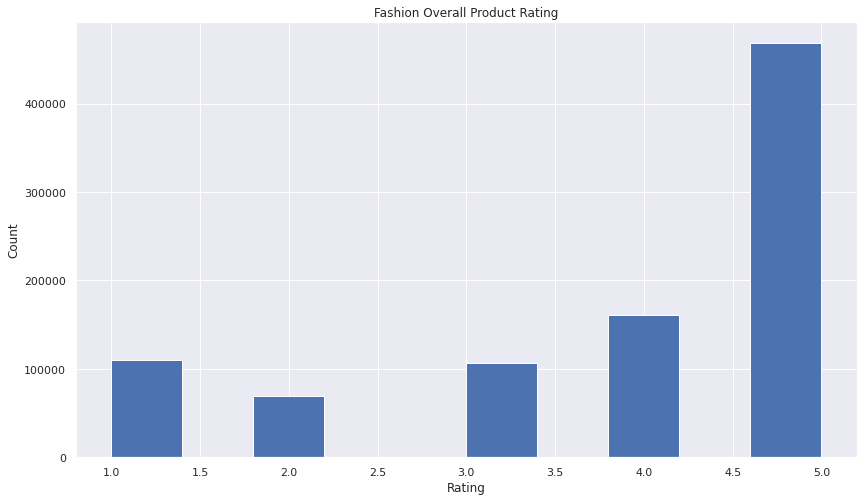

In [ ]:
#A Histogram on fashion overall product rating
plt.hist(merged_fashion_brands['Rating'],10)
plt.title('Fashion Overall Product Rating')
plt.ylabel('Count')
plt.xlabel('Rating')
plt.show()

(array([ 33641.,      0.,  19340.,      0.,      0.,  30040.,      0.,
        59801.,      0., 274375.]), array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]), <a list of 10 Patch objects>) Text(0.5, 1.0, 'Beauty Overall Product Rating') Text(0, 0.5, 'Count') Text(0.5, 0, 'Rating')


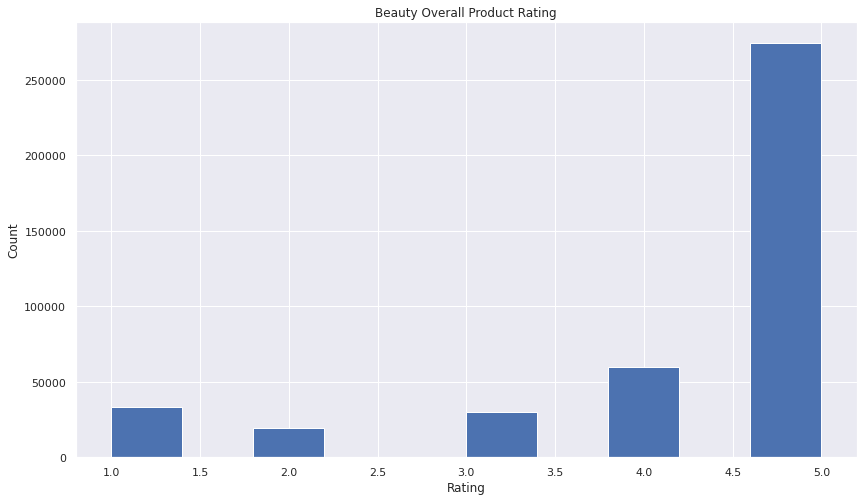

In [ ]:
#A Histogram on beauty overall product rating
plt.hist(merged_beauty_brands['Rating'],10)
plt.title('Beauty Overall Product Rating')
plt.ylabel('Count')
plt.xlabel('Rating')
plt.show()

(array([ 50.,   0.,  60.,   0.,   0., 129.,   0., 286.,   0., 665.]), array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]), <a list of 10 Patch objects>) Text(0.5, 1.0, 'Luxury Overall Product Rating') Text(0, 0.5, 'Count') Text(0.5, 0, 'Rating')


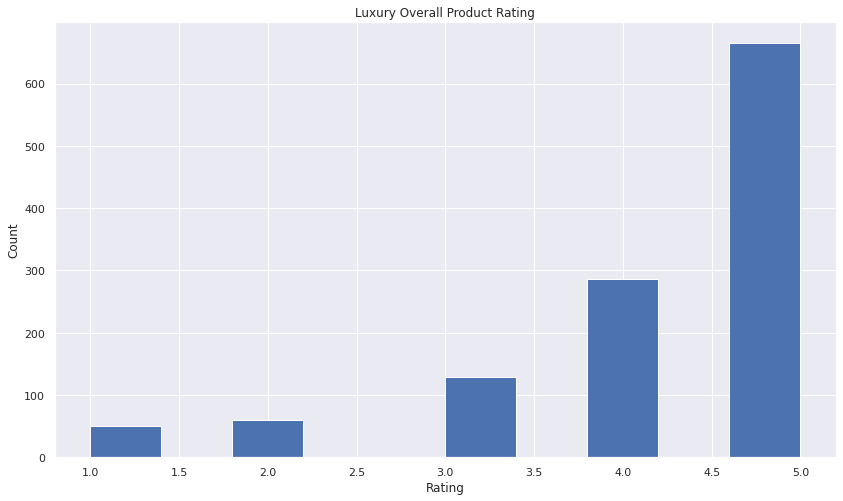

In [ ]:
#A Histogram on luxury overall product rating
plt.hist(merged_luxury_brands['Rating'],10)
plt.title('Luxury Overall Product Rating')
plt.ylabel('Count')
plt.xlabel('Rating')
plt.show()

5.0 has the highest counts and 2.5 has the lowest count.

Observations

The following observations can be noted from the above visualizations:

 All different categories of product received high ratings of 5.0 stars followed by 4.0 stars to 3.0 stars respectively. This similar trend cut across the 3 categories of fashion, all beauty and luxury beauty where the ratings with the highest frequency was 5.0.
1. For Fashion, the reviews that received 5 stars were 450,000 ratings. The reviews that received 4 stars were 150, 000 ratings and the reviews that received 3 stars were 100, 000 ratings. Very few reviews received 2 and 1 stars.
2. For All Beauty, the reviews that received 5 stars were 250,000 ratings. The reviews that received 4 stars were 50, 000 ratings and the reviews that received 3 stars were 30, 000 ratings.Very few reviews received 2 and 1 stars also.
3. For Luxury Beauty, the reviews that received 5 stars were 650 ratings. The reviews that received 4 stars were 300 ratings and the reviews that received 3 stars were 100 ratings.Very few reviews received 2 and 1 stars.

Conclusion and Recommendations
1. All 3 categories: fashion all beauty and luxury beauty should maintain the quality of services and products because the products reviews mainly received high ratings.


Countplots

In [ ]:
# Define the figure size
sns.set(rc = {'figure.figsize':(14,8)})

# Define the function for plotting the univariate
def countplot(d, col1):
  ans= sns.countplot(data = merged_fashion_brands, x = col1)

In [ ]:
# brand 
# Calling the function
print(countplot(merged_fashion_brands, 'brand', ));
# Title
plt.title('A Count Plot on Fashion Brands');

NameError: ignored

Observations

The following observations can be noted from the above visualizations:

1. H20+Beauty and UNITE Hair had the highest number of reviewers.
2. Zwilling J.A. Heckels and bliss followed in the number of reviewers, meaning these brands were moderately popular brands.
3. The brands Kneipp and Purr were the least popular due to the low number of reviews.


Conclusion and Recommendations
1. Kneipp and Purr brands can increase their popularity through brand promotion.

AxesSubplot(0.125,0.125;0.775x0.755) Text(0.5, 1.0, 'A Count Plot on Verified Reviews')


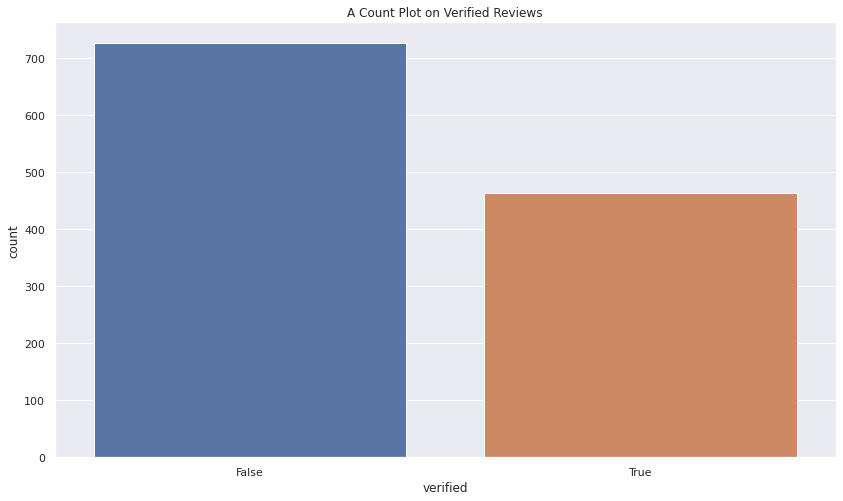

In [ ]:
# verified
# Calling the function
print(countplot(merged_luxury_brands, 'verified'));
# Title
plt.title('A Count Plot on Verified Reviews');

Observations

1. A higher number of verified reviews were false rather than true meaning most customers were not verified reviewers. Customers purchased the product with deep discount or any other form of coercion.

Conclusion and Recommendations
1. Quality of products should be improved in order for customers to give a higher number of verified reviews.

AxesSubplot(0.125,0.125;0.775x0.755) Text(0.5, 1.0, 'A Count Plot on Review Product ID')


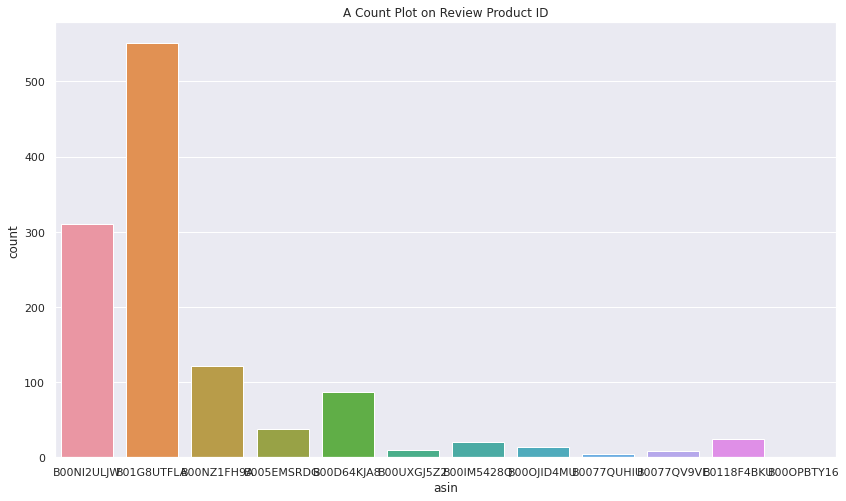

In [ ]:
# asin column
# Calling the function
print(countplot(merged_luxury_brands, 'asin'));
# Title
plt.title('A Count Plot on Review Product ID');

 Observations

The following observations can be noted from the above visualizations:

1. The product ID with the highest number of reviews was B01G8UTFL at a count of 550 followed by B00N12ULJ at 310 then B00NZ1FH9 at 120. 
2. The product ID with the least number of reviews was B00PTY16.


Conclusion and Recommendations
1. A pattern is noticed in the reviews that a large majority of the customers are satisfied with the fashion, all beauty and luxury beauty products. Further analysis will be carried out in the bivariate section.

# Bivariate Analysis

## Categorical vs Categorical

#### Clustered bars.

In [ ]:
# Define the figure size
sns.set(rc = {'figure.figsize':(14,8)})

# Define the function for plotting the bivariate
def countplot(d, col1, col2):
  ans= sns.countplot(data = merged_luxury_brands, x = col1, hue = col2)
  

None


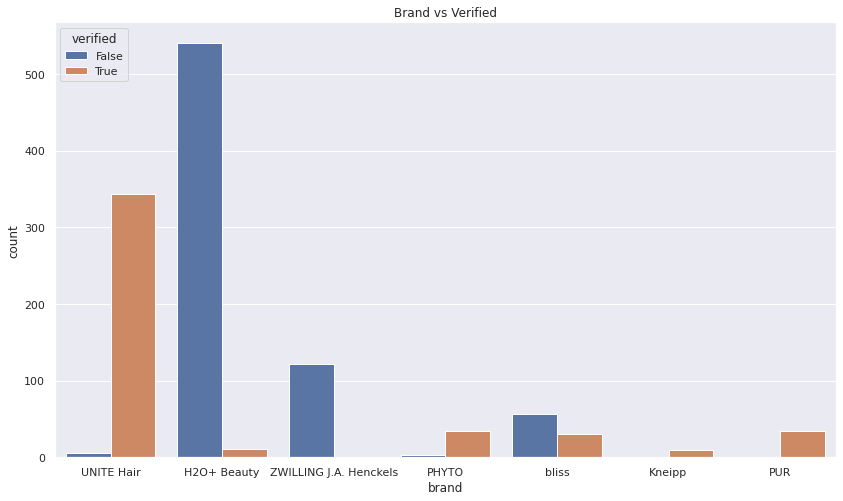

In [ ]:
# brand vs verified
# Calling the function
print(countplot(merged_luxury_brands, 'brand', 'verified'));
# Title
plt.title('Brand vs Verified');

Verified variable means amazon have verified the that the reviewer has purchased the product without deep discount or any other form of coersion.

From the above visualization we note the following observations;

1. Unite Hair had the most verified reviewers.

2. All the reviewers of Kneipp and PUR brands were verified.

3. H2O + Beauty had the most unverified reviewers followed by ZWILLING J.A
  Henckles

### Conclusions.

1. The reviewers of Unite hair are genuine and most likely return customers.

2. Based on the reviews , the popularity of Kneipp and PUR brands is quite low.


### Recommendation.

1. The unite hair brand could widen their product range, introduce promotions 
   such as discounts or giveaways to increase the sales volume in already 
   existing customer base.
2. Kneip and PUR should engage in an extensive product promotion and brand awareness inorder to widen their market scope for their products

None


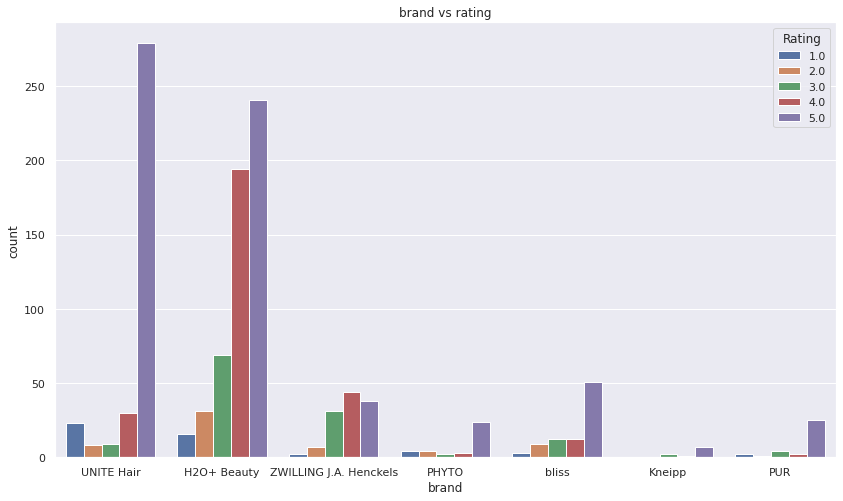

In [ ]:
# Brand vs Rating
# Calling the function
print(countplot(merged_luxury_brands, 'brand', 'Rating'))
# Title
plt.title('brand vs rating');

From the visualization above we note the following:

1. Unite hair, H2O+Beauty, PHYTO, bliss, kneipp and Pur have the highest ratings as 5.0 among the reviews.

2. ZWILLING J.A Henckels's  highest ratings is 4.0 followed by 5.0 and 3.0 respectively.

### Conclusion

1. Most of the customers of Unite hair, H2O+Beauty, PHYTO, bliss, kneipp and 
   Pur are fully satisfied with brand products.
2. Customers of ZWILLING J.A Henckels are satisfied with the brand products
   but they are not fully satisfied.

## Recommendation

1. Unite hair, H2O+Beauty, PHYTO, bliss, kneipp and Pur  should maintain the same quality of services, product standards and userbility to retain the customers loyalty to their brands.

2. ZWILLING J.A Henckels should improve on the quality and services of their products, inorder to meet the needs of their customers and for their products to receive better ratings.

# Sentiment Analysis

In [ ]:
# Imports
import nltk
import spacy as sc
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
import re
%matplotlib inline

In [ ]:
# NLTK downloads
nltk.download([
               'stopwords',
               'punkt',
               'names',
               'vader_lexicon',
               'wordnet',
               'averaged_perceptron_tagger',
               'omw-1.4',
               'sentiwordnet'
               
               
])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already u

True

In [ ]:
!pip install vaderSentiment

In [ ]:
# nltk imports
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.corpus import sentiwordnet as swn

## Data Preparation

In [ ]:
# Copy of the original dataset
review = merged_fashion_brands.copy()


### Cleaning

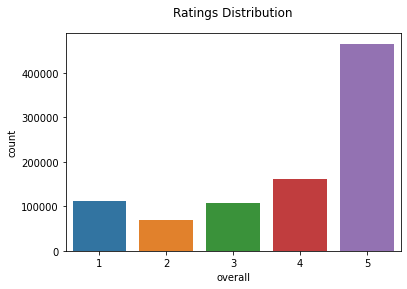

In [ ]:
# Preview of ratings distribution
sns.countplot(data = review, x = 'overall')
plt.title('Ratings Distribution', y = 1.05)
plt.show()

Most ratings were great.

In [ ]:
# Removing special and numbers characters
def RemoveSpecial(text):
  # Removing special characters
  text = re.sub('[^a-zA-Z]+', ' ', text)
  return text



In [ ]:
# Creating a cleaned review column
review['cleanedReview'] = review['reviewText'].apply(RemoveSpecial) 
# Previewing changes
review['cleanedReview'].head()

In [ ]:
# Tokenizing and POS tagging for lemmatization
def POSTag(text):
  tagged = pos_tag(word_tokenize(text))
  # List that will contain final results
  tagged_new = []
  # Dictionary to covert POS tags to WordNet tags for lemmatization
  pos_dict =  {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
  # Removing stop words
  for word, tag in tagged:
    if word.lower() not in set(stopwords.words('english')):
      tagged_new.append(tuple([word, pos_dict.get(tag[0])]))
  return tagged_new

In [ ]:
# Creating a cleaned review column
review['cleanedReviewTagged'] = review['cleanedReview'].apply(POSTag) 
# Previewing changes
review['cleanedReviewTagged'].head()

In [ ]:
# Previewing changes
review[['reviewText', 'cleanedReview', 'cleanedReviewTagged']].head()

In [ ]:
# Saving changes for faster processing
pos_tagging = review.to_csv('pos_tagged_reviews.csv')

In [ ]:
# Lemmatization function
def lemmatize(tagged_data):
  lemmatizer = WordNetLemmatizer()
  lemmatized = ' '
  for word, pos in tagged_data:
    if not pos:
      lemma = word
      lemmatized = lemmatized + ' ' + lemma
    else:
      lemma = lemmatizer.lemmatize(word, pos=pos)
      lemmatized = lemmatized + ' ' + lemma
  return lemmatized




In [ ]:
# Lemmatization
review['cleanedReviewLemmatized'] = review['cleanedReviewTagged'].apply(lemmatize)
review['cleanedReviewLemmatized'].head()

In [ ]:
# Saving changes for faster processing
lemmatized_reviews = review.to_csv('lemmatized_reviews.csv')

Extracting Sentiments

In [ ]:
TextBlob(review['cleanedReviewLemmatized'].iloc[0]).sentiment

In [ ]:
# Dataset loading
reviews_cleaned = pd.read_csv('lemmatized_reviews.csv')

**TextBlob**

## ABSA

In [ ]:
# Loading spacy model
nlp = spacy.load("en_core_web_sm")

In [ ]:
# Dataset loading
reviews_cleaned = pd.read_csv('lemmatized_reviews.csv')
# Previewing columns
reviews_cleaned.columns

Index(['Unnamed: 0', 'overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'Item',
       'Rating', 'Timestamp', 'brand', 'cleanedReview', 'cleanedReviewTagged',
       'cleanedReviewLemmatized'],
      dtype='object')

In [ ]:
# ABSA function
def ABSA(text):
  aspects = []
  i = 0
  for i, sentence in enumerate(text):
    doc = nlp(sentence)
    descriptive_term = ''
    target = ''
    for token in doc:
      # Obtaining nouns
      if (token.pos_ == 'NOUN'):
        target = token.text
        # Obtaining adjectives
      if token.pos_ == 'ADJ':
        prepend = ''
        for child in token.children:
          # Obtaning adverbs
          if child.pos_ != 'ADV':
            continue
          prepend += child.text + ' '
        descriptive_term = prepend + token.text
    aspects.append({'aspect': target,
      'description': descriptive_term})
  return aspects


In [ ]:
# Aspects and descriptions preview
ABSA(reviews_cleaned['cleanedReviewLemmatized'].iloc[0:5])

[{'aspect': 'Love', 'description': 'Simply elegant'},
 {'aspect': 'Love', 'description': 'Simply elegant'},
 {'aspect': '', 'description': ''},
 {'aspect': '', 'description': ''},
 {'aspect': 'shipping', 'description': 'fast'}]

In [ ]:
# Performing ABSA on reviews.
reviews_cleaned['ABSA'] = ABSA(reviews_cleaned['cleanedReviewLemmatized'])

In [ ]:
# Saving result toa csv file for ease of re-use.
absa = reviews_cleaned.to_csv('absa.csv')

In [ ]:
# Loading saved csv.
absa = pd.read_csv('absa.csv')

In [ ]:
# Previewing changes
absa['ABSA'].head()

0    {'aspect': 'Love', 'description': 'Simply eleg...
1    {'aspect': 'Love', 'description': 'Simply eleg...
2                    {'aspect': '', 'description': ''}
3                    {'aspect': '', 'description': ''}
4        {'aspect': 'shipping', 'description': 'fast'}
Name: ABSA, dtype: object

In [ ]:
# Positive aspects
positive = absa[absa['overall'] >=4]
neutral = absa[absa['overall'] == 3]
negative = absa[absa['overall'] < 3]

In [ ]:
# ABSA column results
results_positive = positive['ABSA']
results_neutral = neutral['ABSA']
results_negative = negative['ABSA']
results_positive.head()

0    {'aspect': 'Love', 'description': 'Simply eleg...
1    {'aspect': 'Love', 'description': 'Simply eleg...
2                    {'aspect': '', 'description': ''}
3                    {'aspect': '', 'description': ''}
4        {'aspect': 'shipping', 'description': 'fast'}
Name: ABSA, dtype: object

In [ ]:
# Retriving dictionary
positive_dicts = []
neutral_dicts = []
negative_dicts = []
# Coverting strings to dictionary
for value in results_positive:
  positive_dicts.append(ast.literal_eval(value))
for value in results_neutral:
  neutral_dicts.append(ast.literal_eval(value))
for value in results_negative:
  negative_dicts.append(ast.literal_eval(value))

In [ ]:
# Apsects and descriptions
positive_aspects = []
neutral_aspects = []
negative_aspects = []
positive_descriptions = []
neutral_descriptions = []
negative_descriptions = []
for value in positive_dicts:
  positive_aspects.append(value['aspect'])
  positive_descriptions.append(value['description'])
for value in neutral_dicts:
  neutral_aspects.append(value['aspect'])
  neutral_descriptions.append(value['description'])
for value in negative_dicts:
  negative_aspects.append(value['aspect'])
  negative_descriptions.append(value['description'])
# Preview
positive_aspects[:5]

['Love', 'Love', '', '', 'shipping']

In [ ]:
# Removing empty aspects
positive_aspects = [value for value in positive_aspects if value != '']
positve_descriptions = [value for value in positive_descriptions if value != '']
neutral_aspects = [value for value in neutral_aspects if value != '']
neutral_descriptions = [value for value in neutral_descriptions if value != '']
negative_aspects = [value for value in negative_aspects if value != '']
negative_descriptions = [value for value in negative_descriptions if value != '']
positive_aspects[:5]

['Love', 'Love', 'shipping', 'shipping', 'lace']

**Word Clouds**

In [ ]:
# Word cloud function.
def Cloud(data):
  unique_string = ' '.join(data)
  fig, ax = plt.subplots(figsize = (15, 8))
  word_cloud = WordCloud(width =5000, height = 3000,
                         background_color='white',
                         colormap = 'viridis').generate(unique_string)
  plt.imshow(word_cloud)
  plt.axis("off")
  plt.title('Aspect Word Cloud', y = 1.05)
  plt.show()



In [ ]:
# Amazon logo word cloud function.
def CustomCloud(data, path):
  unique_string = ' '.join(data)
  mask = np.array(Image.open(path))
  wordcloud = WordCloud(width = 3000, height = 2000, random_state=1,
                        background_color='white', colormap='viridis',
                        collocations=False,
                        max_font_size=70,
                        mask=mask).generate(unique_string)
  # create coloring from image
  image_colors = ImageColorGenerator(mask)
  plt.figure(figsize=(20,20))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  # store to file
  plt.savefig("amazon.png", format="png") 
  plt.show()


In [ ]:
# Amazon logo word cloud mask.
mask = np.array(Image.open("amazon_logo_2.png"))

**Positive**

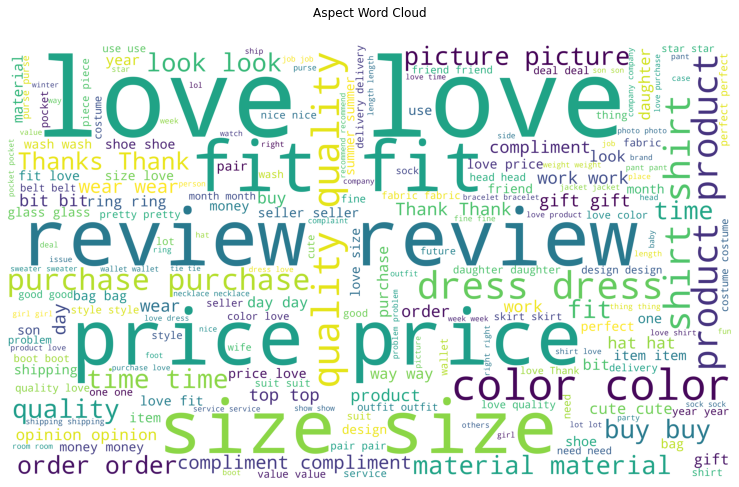

In [ ]:
# Positive apsects word cloud.
Cloud(positive_aspects)

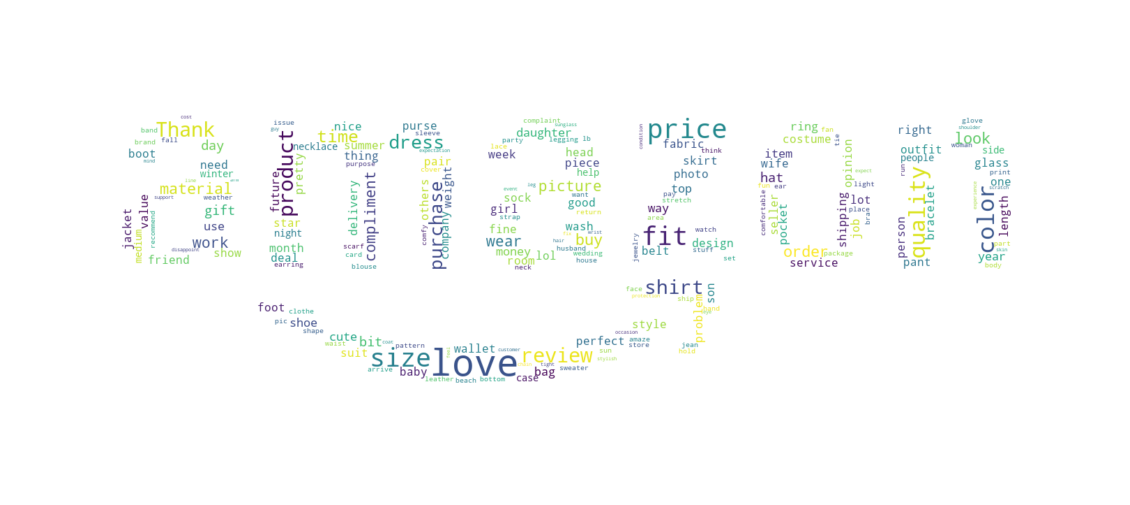

In [ ]:
# Positive apsects amazon word cloud.
CustomCloud(positive_aspects, "amazon_logo_2.png")

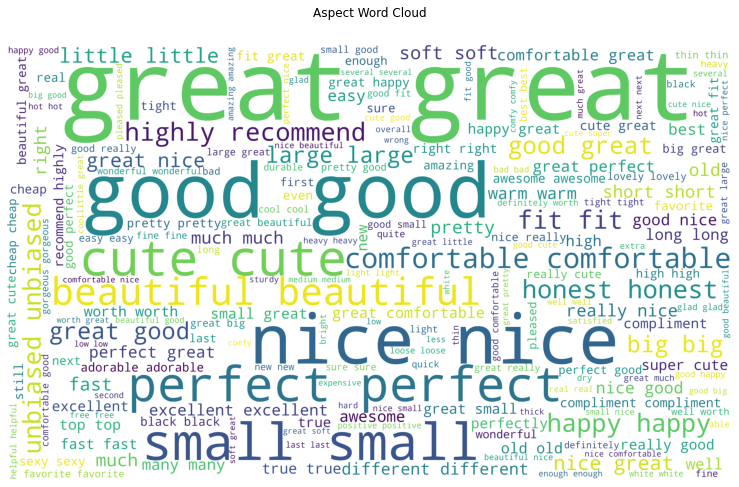

In [ ]:
# Positive descriptions word cloud.
Cloud(positive_descriptions)

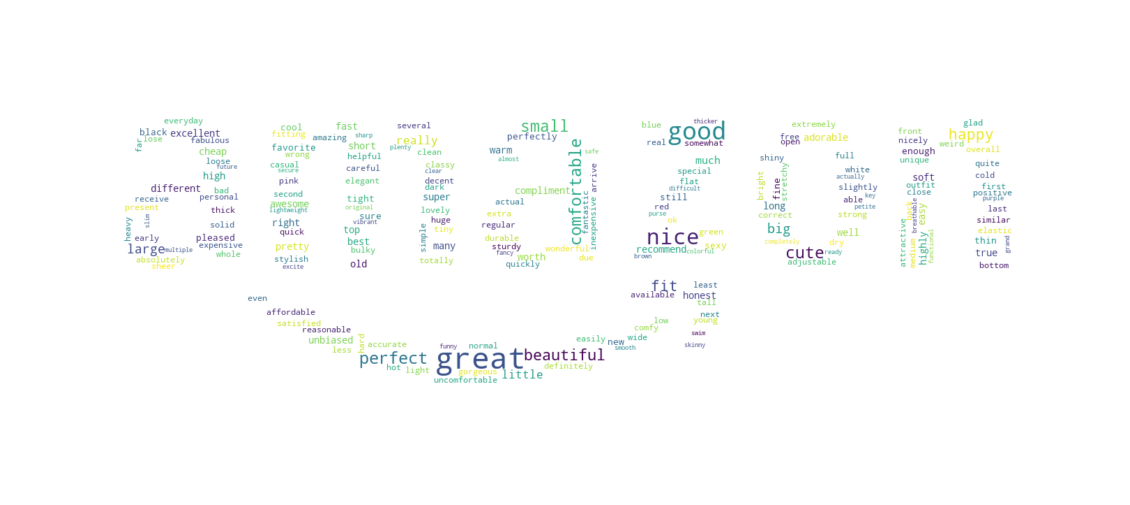

In [ ]:
# Amazon logo.
CustomCloud(positive_descriptions, "amazon_logo_2.png")

**Neutral**

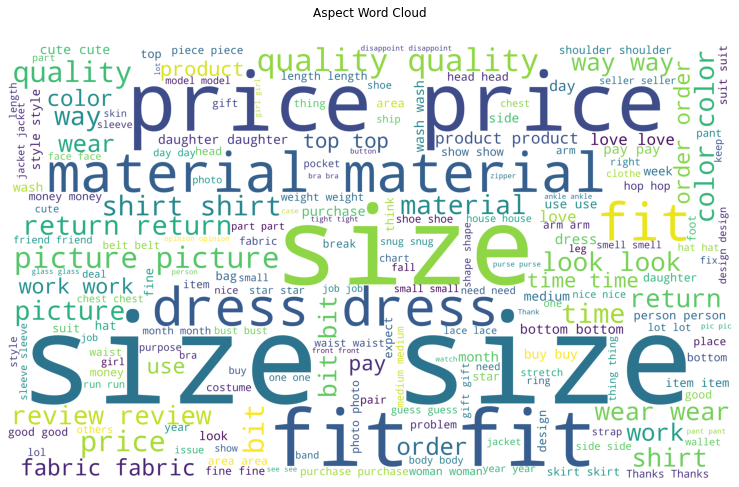

In [ ]:
# Neutral descriptions word cloud.
Cloud(neutral_aspects)

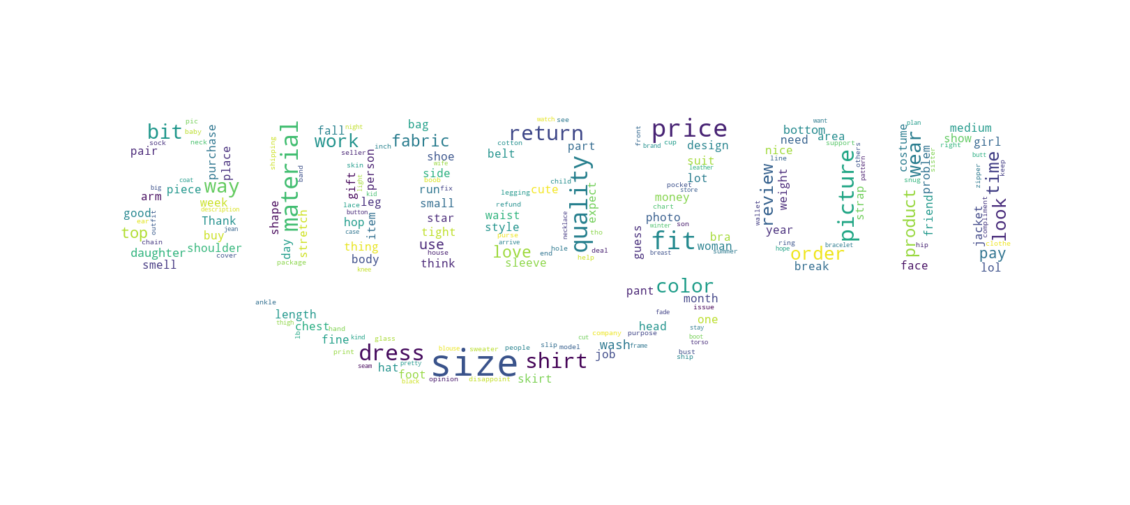

In [ ]:
# Amazon logo.
CustomCloud(neutral_aspects, "amazon_logo_2.png")

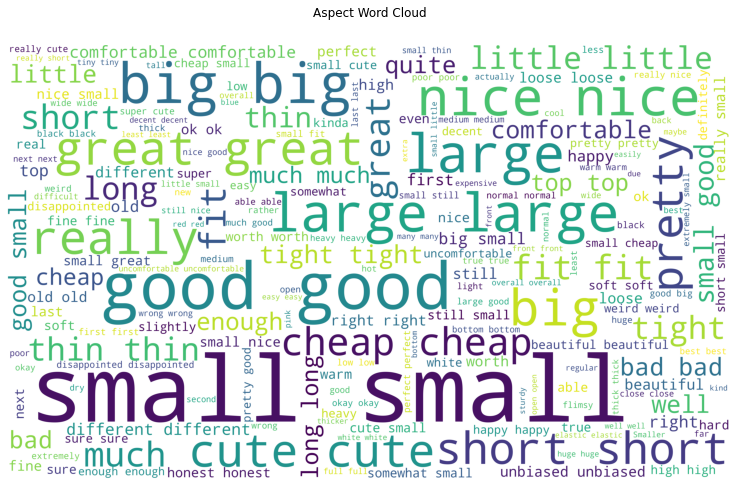

In [ ]:
# Neutral apsects word cloud.
Cloud(neutral_descriptions)

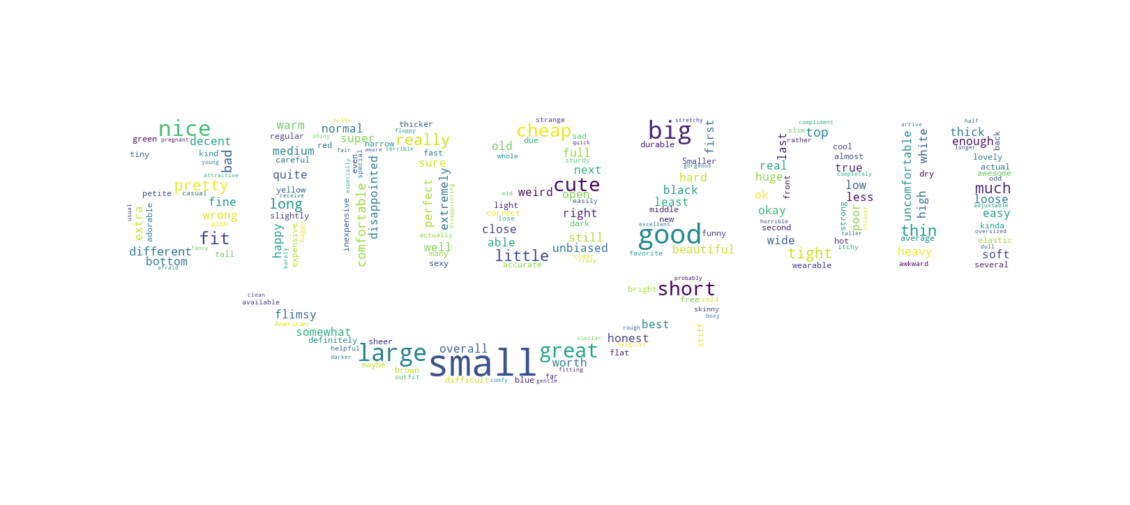

In [ ]:
# Amazon logo.
CustomCloud(neutral_descriptions, "amazon_logo_2.png")

**Negative**

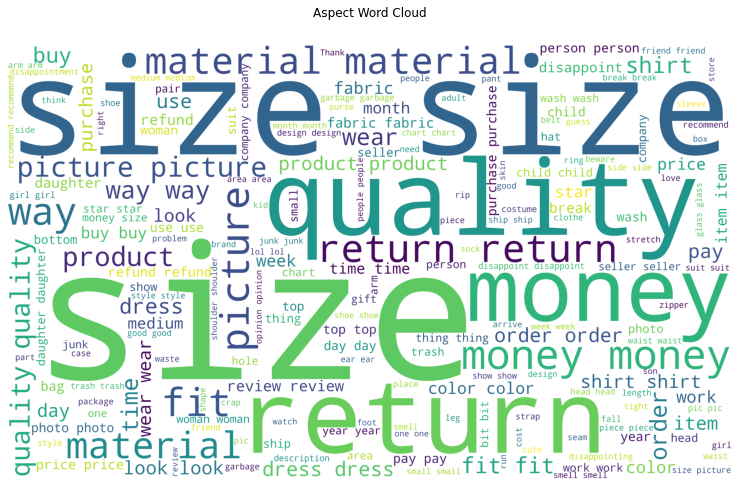

In [ ]:
# Negative apsects word cloud.
Cloud(negative_aspects)

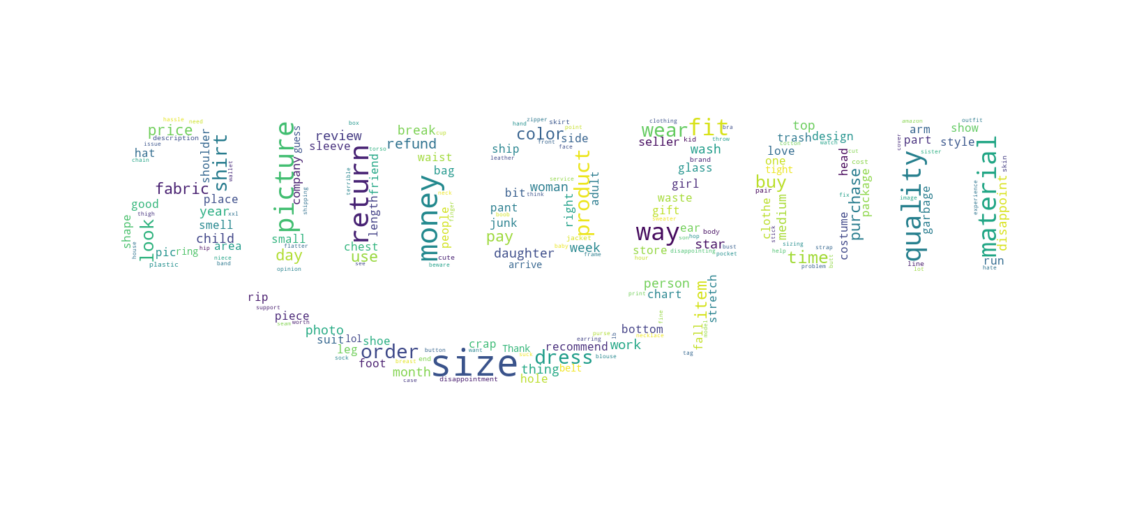

In [ ]:
# Amazon logo.
CustomCloud(negative_aspects, "amazon_logo_2.png")

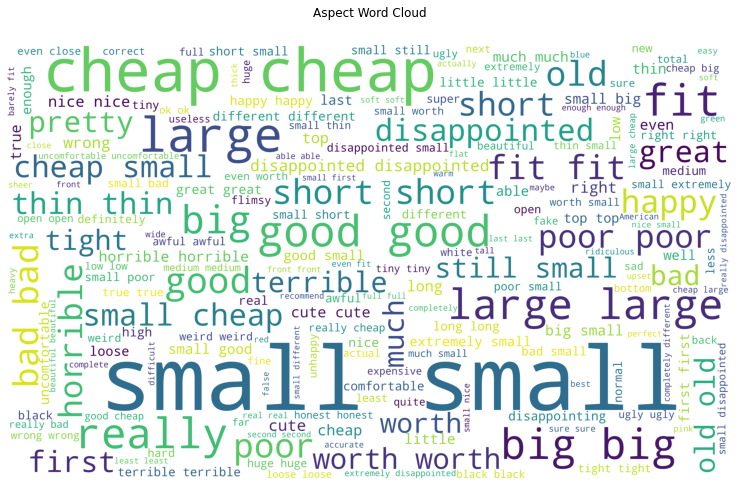

In [ ]:
# negative apsects word cloud.
Cloud(negative_descriptions)

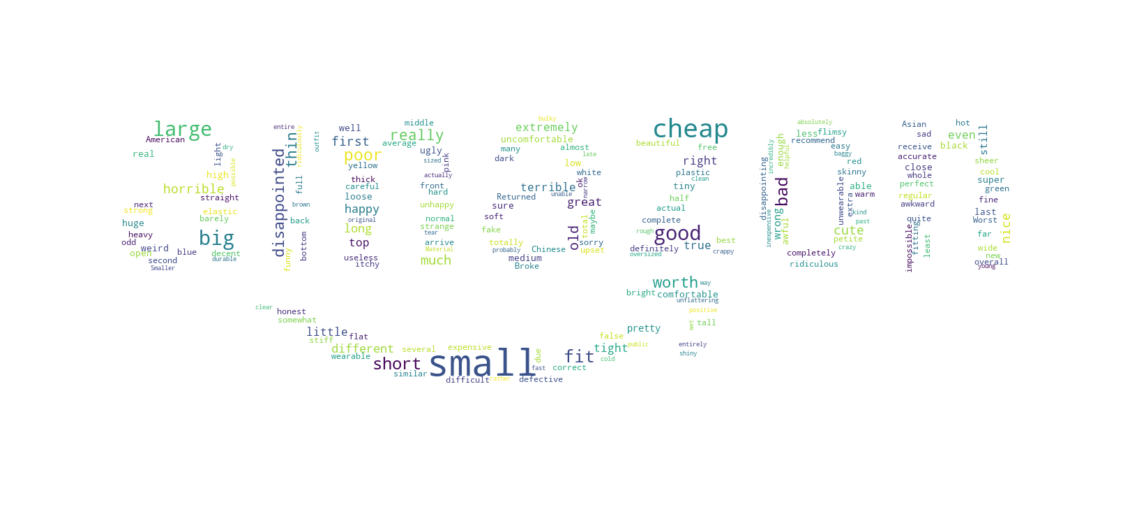

In [ ]:
# Amazon logo.
CustomCloud(negative_descriptions, "amazon_logo_2.png")

In [ ]:
# Aspects
positive_aspects = pd.Series(positive_aspects)
neutral_aspects = pd.Series(neutral_aspects)
negative_aspects = pd.Series(negative_aspects)
# Descriptions
positive_descriptions = pd.Series(positive_descriptions)
neutral_descriptions = pd.Series(neutral_descriptions)
negative_descriptions = pd.Series(negative_descriptions)
# Unique aspects
unique_pa = pd.Series(np.unique(positive_aspects))
unique_nua = pd.Series(np.unique(neutral_aspects))
unique_na = pd.Series(np.unique(negative_aspects))
# Unique descriptions
unique_pdesc = pd.Series(np.unique(positive_descriptions))
unique_nudesc = pd.Series(np.unique(neutral_descriptions))
unique_ndesc = pd.Series(np.unique(negative_descriptions))

**Positive Aspects**

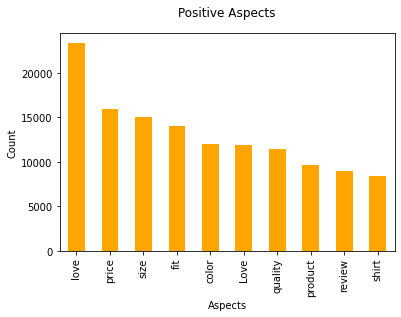

In [ ]:
# Aspects value counts
positive_aspects.value_counts()[:10].plot.bar(color = 'orange')
plt.title('Positive Aspects', y = 1.05)
plt.xlabel('Aspects')
plt.ylabel('Count');

The most positively reviewed factors are the price, quality, fit (size) and appearance.

**Positive Descriptions**

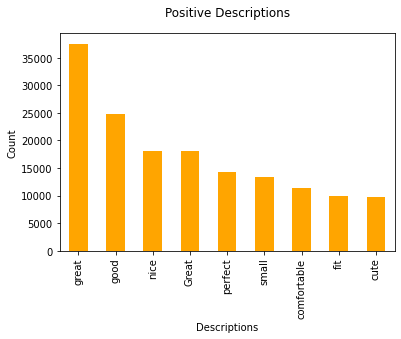

In [ ]:
# Descriptions value counts
positive_descriptions.value_counts()[1:10].plot.bar(color = 'orange')
plt.title('Positive Descriptions', y = 1.05)
plt.xlabel('Descriptions')
plt.ylabel('Count');

Most customers found the clothes to be great in terms of comfort, fit and appearance.

**Neutral Aspects**

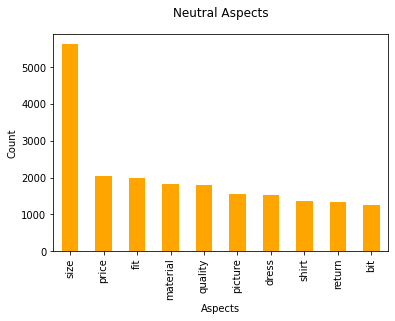

In [ ]:
# Aspects value counts
neutral_aspects.value_counts()[:10].plot.bar(color = 'orange')
plt.title('Neutral Aspects', y = 1.05)
plt.xlabel('Aspects')
plt.ylabel('Count');

Neutral aspects included the size, price, fit, type of material, quality and return policy.

**Neutral Descriptions**

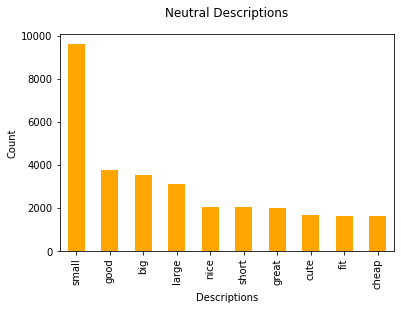

In [ ]:
# Descriptions value counts
neutral_descriptions.value_counts()[:10].plot.bar(color = 'orange')
plt.title('Neutral Descriptions', y = 1.05)
plt.xlabel('Descriptions')
plt.ylabel('Count');

Neutral descriptions included the size, appearance and price.

**Negative Aspects**

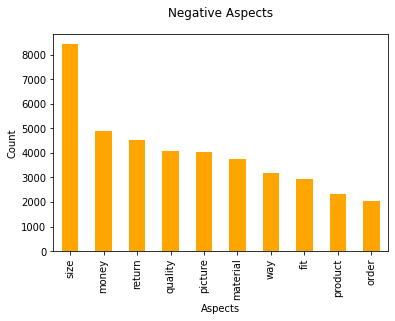

In [ ]:
# Aspects value counts
negative_aspects.value_counts()[:10].plot.bar(color = 'orange')
plt.title('Negative Aspects', y = 1.05)
plt.xlabel('Aspects')
plt.ylabel('Count');

Majority of the negative aspects were the fit of the clothes, the price, type of material and problems with the orders.

**Negative Descriptions**

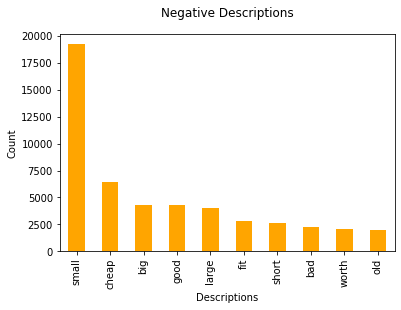

In [ ]:
# Descriptions value counts
negative_descriptions.value_counts()[:10].plot.bar(color = 'orange')
plt.title('Negative Descriptions', y = 1.05)
plt.xlabel('Descriptions')
plt.ylabel('Count');

Majority of the negative descriptions were the size, price and quality.

## Modelling

### TextBlob and VADER

In [ ]:
# Textblob sentiments
def TextBlobSentiment(text):
  # Subjectivity
  subjectivity = TextBlob(text).sentiment.subjectivity
  # Polarity
  polarity = TextBlob(text).sentiment.polarity
  # Sentiments
  if polarity > 0:
    return 'Positive'
  elif polarity == 0:
    return 'Neutral'
  else:
    return 'Negative'

# VADER sentiment
def VADERSentiments(text):
  # Analyzer
  vader = SentimentIntensityAnalyzer()
  polarity = vader.polarity_scores(text)
  compound_score = polarity['compound']
  # Sentiments
  if compound_score >= 0.5:
    return 'Positive'
  elif (compound_score > -0.5) & (compound_score < 0.5): 
    return 'Neutral'
  else: 
    return 'Negative'


In [ ]:
# Loading data
absa = pd.read_csv('absa.csv')

In [ ]:
# Sampling to reduce computation time.
stratified = absa.groupby('overall', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1),
                                                             random_state = 100)
stratified.shape

(91618, 19)

In [ ]:
# Classification report funtion
def Report(y_test, y_pred, data):
  print('\nClassification Report\n')
  report = classification_report(data[y_test], data[y_pred])
  print(report)
  print()
  print()
  # Heatmap
  fig, ax = plt.subplots(figsize = (10, 8))
  sns.heatmap(confusion_matrix(data[y_test], data[y_pred]),
              xticklabels=data[y_test].unique(),
              yticklabels=data[y_test].unique(),annot=True,
            cmap='viridis', fmt = 'g')
  plt.title('Heatmap', y = 1.05);

In [ ]:
# Grouping sentiments for the overall rating.
stratified['Grouped_Sentiments'] = ''
# Positive sentiments
stratified.loc[stratified['overall'] > 3,
               'Grouped_Sentiments'] = 'Positive'
# Neutral sentiments
stratified.loc[stratified['overall'] == 3,
               'Grouped_Sentiments'] = 'Neutral'
# Negative sentiments
stratified.loc[stratified['overall'] < 3,
               'Grouped_Sentiments'] = 'Negative'               

In [ ]:
# New columns to be used to store the TextBlob and VADER sentiments.
stratified['TextBlob_Sentiments'] = ''
stratified['VADER_Sentiments'] = ''

In [ ]:
# Reseting the index.
stratified.reset_index(drop = True, inplace = True)
stratified.head()

Unnamed: 0  Unnamed: 0.1  overall  verified   reviewTime      reviewerID  \
0      743432        743432        1      True  07 25, 2014   AKSMCU94DV09S   
1      403366        403366        1      True  09 25, 2015  A21G9YN0O9NF54   
2      871823        871823        1      True  06 14, 2016  A2HQJEH6DR2JJ1   
3      732535        732535        1      True  01 22, 2014   A7YIDFP5EN3YB   
4      660142        660142        1      True   05 5, 2016  A3DSYPCLP0021U   

         asin reviewerName                                         reviewText  \
0  B00KQCOCCY     Nanyelin                        Way too large. Doesn't fit.   
1  B00JUJIOG4  Rande Capps              Can  not  wash  this  stiff and  hard   
2  B019WAJGY4      Law Dog  This watch was complete junk!  It quit working...   
3  B00FY5J4FI  G. Dearsman  There is a sticker underneath the loom sticker...   
4  B017LTOL84  Sondra bell  it was too small, I couldn't get it over my he...   

                            summary  ...  Rating   Timestamp           brand  \
0                      Does not fit  ...     1.0  1406246400     WOW CLOTHES   
1  Can not wash this stiff and hard  ...     1.0  1443139200        TRURENDI   
2                    Complete Junk!  ...     1.0  1465862400         ShuHang   
3                 False Advertising  ...     1.0  1390348800  Funky Loomz TM   
4                          One Star  ...     5.0  1462406400         Froomer   

                                       cleanedReview  \
0                         Way too large Doesn t fit    
1                   Can not wash this stiff and hard   
2  This watch was complete junk It quit working w...   
3  There is a sticker underneath the loom sticker...   
4  it was too small I couldn t get it over my hea...   

                                 cleanedReviewTagged  \
0       [('Way', 'n'), ('large', 'a'), ('fit', 'n')]   
1     [('wash', 'v'), ('stiff', 'n'), ('hard', 'a')]   
2  [('watch', 'n'), ('complete', 'a'), ('junk', '...   
3  [('sticker', 'n'), ('underneath', None), ('loo...   
4  [('small', 'a'), ('get', 'v'), ('head', 'n'), ...   

                             cleanedReviewLemmatized  \
0                                      Way large fit   
1                                    wash stiff hard   
2    watch complete junk quit work within matter ...   
3    sticker underneath loom sticker find make so...   
4                  small get head shirt small person   

                                            ABSA Grouped_Sentiments  \
0      {'aspect': 'fit', 'description': 'large'}           Negative   
1         {'aspect': '', 'description': 'stiff'}           Negative   
2  {'aspect': 'crap', 'description': 'complete'}           Negative   
3  {'aspect': 'item', 'description': 'complete'}           Negative   
4   {'aspect': 'person', 'description': 'small'}           Negative   

  TextBlob_Sentiments VADER_Sentiments  
0            Positive          Neutral  
1            Negative          Neutral  
2            Negative          Neutral  
3            Positive          Neutral  
4            Negative          Neutral  

[5 rows x 22 columns]

**TextBlob**

In [ ]:
# TextBlob sentiments.
row = 0
for text in stratified['cleanedReviewLemmatized']:
  stratified.loc[row, 'TextBlob_Sentiments'] = TextBlobSentiments(text)
  row += 1

**VADER**

In [ ]:
# VADER sentiments.
row = 0
for text in stratified['cleanedReviewLemmatized']:
  stratified.loc[row, 'VADER_Sentiments'] = VADERSentiments(text)
  row += 1

In [ ]:
# Dataset copy.
stratified_encoded = stratified.copy()

In [ ]:
# Previewing changes.
stratified_encoded.head()

Unnamed: 0  Unnamed: 0.1  overall  verified   reviewTime      reviewerID  \
0      743432        743432        1      True  07 25, 2014   AKSMCU94DV09S   
1      403366        403366        1      True  09 25, 2015  A21G9YN0O9NF54   
2      871823        871823        1      True  06 14, 2016  A2HQJEH6DR2JJ1   
3      732535        732535        1      True  01 22, 2014   A7YIDFP5EN3YB   
4      660142        660142        1      True   05 5, 2016  A3DSYPCLP0021U   

         asin reviewerName                                         reviewText  \
0  B00KQCOCCY     Nanyelin                        Way too large. Doesn't fit.   
1  B00JUJIOG4  Rande Capps              Can  not  wash  this  stiff and  hard   
2  B019WAJGY4      Law Dog  This watch was complete junk!  It quit working...   
3  B00FY5J4FI  G. Dearsman  There is a sticker underneath the loom sticker...   
4  B017LTOL84  Sondra bell  it was too small, I couldn't get it over my he...   

                            summary  ...  Rating   Timestamp           brand  \
0                      Does not fit  ...     1.0  1406246400     WOW CLOTHES   
1  Can not wash this stiff and hard  ...     1.0  1443139200        TRURENDI   
2                    Complete Junk!  ...     1.0  1465862400         ShuHang   
3                 False Advertising  ...     1.0  1390348800  Funky Loomz TM   
4                          One Star  ...     5.0  1462406400         Froomer   

                                       cleanedReview  \
0                         Way too large Doesn t fit    
1                   Can not wash this stiff and hard   
2  This watch was complete junk It quit working w...   
3  There is a sticker underneath the loom sticker...   
4  it was too small I couldn t get it over my hea...   

                                 cleanedReviewTagged  \
0       [('Way', 'n'), ('large', 'a'), ('fit', 'n')]   
1     [('wash', 'v'), ('stiff', 'n'), ('hard', 'a')]   
2  [('watch', 'n'), ('complete', 'a'), ('junk', '...   
3  [('sticker', 'n'), ('underneath', None), ('loo...   
4  [('small', 'a'), ('get', 'v'), ('head', 'n'), ...   

                             cleanedReviewLemmatized  \
0                                      Way large fit   
1                                    wash stiff hard   
2    watch complete junk quit work within matter ...   
3    sticker underneath loom sticker find make so...   
4                  small get head shirt small person   

                                            ABSA Grouped_Sentiments  \
0      {'aspect': 'fit', 'description': 'large'}           Negative   
1         {'aspect': '', 'description': 'stiff'}           Negative   
2  {'aspect': 'crap', 'description': 'complete'}           Negative   
3  {'aspect': 'item', 'description': 'complete'}           Negative   
4   {'aspect': 'person', 'description': 'small'}           Negative   

  TextBlob_Sentiments VADER_Sentiments  
0            Positive          Neutral  
1            Negative          Neutral  
2            Negative          Neutral  
3            Positive          Neutral  
4            Negative          Neutral  

[5 rows x 22 columns]

In [ ]:
# Label encoding the sentiment columns.
lable_encoder = LabelEncoder()
stratified_encoded[['Grouped_Sentiments',	'TextBlob_Sentiments',	'VADER_Sentiments']] = stratified[['Grouped_Sentiments',	'TextBlob_Sentiments',	'VADER_Sentiments']].apply(lable_encoder.fit_transform)

In [ ]:
# Previewing changes.
stratified_encoded.head()

Unnamed: 0  Unnamed: 0.1  overall  verified   reviewTime      reviewerID  \
0      743432        743432        1      True  07 25, 2014   AKSMCU94DV09S   
1      403366        403366        1      True  09 25, 2015  A21G9YN0O9NF54   
2      871823        871823        1      True  06 14, 2016  A2HQJEH6DR2JJ1   
3      732535        732535        1      True  01 22, 2014   A7YIDFP5EN3YB   
4      660142        660142        1      True   05 5, 2016  A3DSYPCLP0021U   

         asin reviewerName                                         reviewText  \
0  B00KQCOCCY     Nanyelin                        Way too large. Doesn't fit.   
1  B00JUJIOG4  Rande Capps              Can  not  wash  this  stiff and  hard   
2  B019WAJGY4      Law Dog  This watch was complete junk!  It quit working...   
3  B00FY5J4FI  G. Dearsman  There is a sticker underneath the loom sticker...   
4  B017LTOL84  Sondra bell  it was too small, I couldn't get it over my he...   

                            summary  ...  Rating   Timestamp           brand  \
0                      Does not fit  ...     1.0  1406246400     WOW CLOTHES   
1  Can not wash this stiff and hard  ...     1.0  1443139200        TRURENDI   
2                    Complete Junk!  ...     1.0  1465862400         ShuHang   
3                 False Advertising  ...     1.0  1390348800  Funky Loomz TM   
4                          One Star  ...     5.0  1462406400         Froomer   

                                       cleanedReview  \
0                         Way too large Doesn t fit    
1                   Can not wash this stiff and hard   
2  This watch was complete junk It quit working w...   
3  There is a sticker underneath the loom sticker...   
4  it was too small I couldn t get it over my hea...   

                                 cleanedReviewTagged  \
0       [('Way', 'n'), ('large', 'a'), ('fit', 'n')]   
1     [('wash', 'v'), ('stiff', 'n'), ('hard', 'a')]   
2  [('watch', 'n'), ('complete', 'a'), ('junk', '...   
3  [('sticker', 'n'), ('underneath', None), ('loo...   
4  [('small', 'a'), ('get', 'v'), ('head', 'n'), ...   

                             cleanedReviewLemmatized  \
0                                      Way large fit   
1                                    wash stiff hard   
2    watch complete junk quit work within matter ...   
3    sticker underneath loom sticker find make so...   
4                  small get head shirt small person   

                                            ABSA Grouped_Sentiments  \
0      {'aspect': 'fit', 'description': 'large'}                  0   
1         {'aspect': '', 'description': 'stiff'}                  0   
2  {'aspect': 'crap', 'description': 'complete'}                  0   
3  {'aspect': 'item', 'description': 'complete'}                  0   
4   {'aspect': 'person', 'description': 'small'}                  0   

  TextBlob_Sentiments  VADER_Sentiments  
0                   2                 1  
1                   0                 1  
2                   0                 1  
3                   2                 1  
4                   0                 1  

[5 rows x 22 columns]

**Results**

*TextBlob*


Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.24      0.14      0.18     11167
           2       0.06      0.59      0.10      6996
           3       0.00      0.00      0.00     10781
           4       0.00      0.00      0.00     16135
           5       0.00      0.00      0.00     46539

    accuracy                           0.06     91618
   macro avg       0.05      0.12      0.05     91618
weighted avg       0.03      0.06      0.03     91618





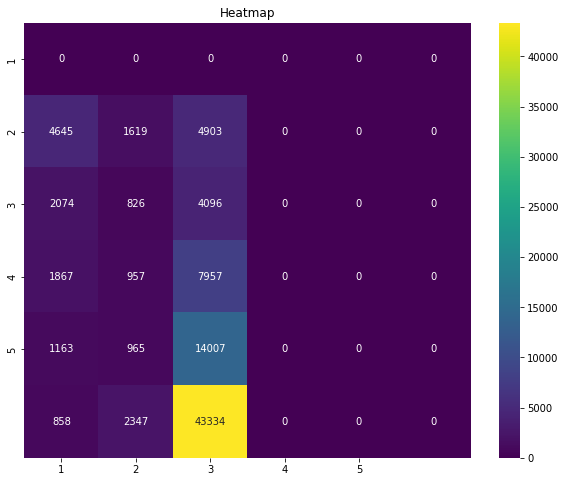

In [ ]:
# TextBlob Classification Report
Report('overall', 'TextBlob_Sentiments', stratified_encoded)

The precision scores and accuracy scores are very low (6%).

*VADER*


Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.25      0.66      0.36     11167
           2       0.04      0.36      0.08      6996
           3       0.00      0.00      0.00     10781
           4       0.00      0.00      0.00     16135
           5       0.00      0.00      0.00     46539

    accuracy                           0.11     91618
   macro avg       0.05      0.17      0.07     91618
weighted avg       0.03      0.11      0.05     91618





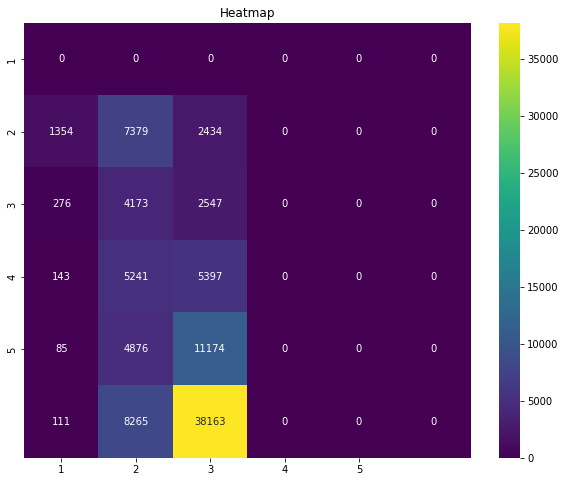

In [ ]:
# VADER Classification Report
Report('overall', 'VADER_Sentiments', stratified_encoded)

Though the perfromance improves slightly, the precision scores and accuracy scores are still very low (11%).

*Saving Results*

In [ ]:
# Saving results
stratified.to_csv('blobVaderXg.csv')

### XGBOOST

**Train-test-splt**

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
from imblearn.over_sampling import SMOTE

In [ ]:
# Loading saved data.
absa = pd.read_csv('absa.csv')

In [ ]:
# Sampling data to reduce execution time.
stratified = absa.groupby('overall', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1,
                                                                                                           random_state = 100))
stratified.shape

(91618, 19)

In [ ]:
# Combining sentiments 
def SentimentGrouping(column1, column2, data):
  # Negative sentiment
  data.loc[data[column1] < 3, column2] = 0
  # Neutral sentiment
  data.loc[data[column1] == 3, column2] = 1
  # Positive sentiment
  data.loc[data[column1] > 3, column2] = 2



In [ ]:
# Rating sentiments
stratified['grouped_sentiments'] = 0
SentimentGrouping('overall', 'grouped_sentiments', stratified)


In [ ]:
# Features and label
X = stratified['cleanedReviewLemmatized'].values
y = stratified['grouped_sentiments'].values
# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,
                                                    random_state = 0)

In [ ]:
# Count Vectorizer
tfid_vectorizer = TfidfVectorizer()
X_train_tfid = tfid_vectorizer.fit_transform(X_train)
X_test_tfid = tfid_vectorizer.transform(X_test)

In [ ]:
# Classification function
def XGBoostClass(X_train, X_test, y_train, y_test):
  classifier = xgb.XGBClassifier()
  classifier.fit(X_train, y_train)
  predictions = classifier.predict(X_test)
  return predictions

In [ ]:
# XGBoost Classifier
y_pred = XGBoostClass(X_train_tfid, X_test_tfid, y_train, y_test)

In [ ]:
# Classification report funtion
def Report_Model(y_test, y_pred):
  print('\nClassification Report\n')
  report = classification_report(y_test, y_pred)
  print(report)
  print()
  print()
  # Heatmap
  fig, ax = plt.subplots(figsize = (10, 8))
  sns.heatmap(confusion_matrix(y_test, y_pred),
              xticklabels=np.unique(y_test),
              yticklabels=np.unique(y_test),annot=True,
            cmap='viridis', fmt = 'g')
  plt.title('Heatmap', y = 1.05);


Classification Report

              precision    recall  f1-score   support

           0       0.73      0.46      0.56      3587
           1       0.42      0.02      0.04      2121
           2       0.77      0.98      0.86     12616

    accuracy                           0.77     18324
   macro avg       0.64      0.49      0.49     18324
weighted avg       0.72      0.77      0.71     18324





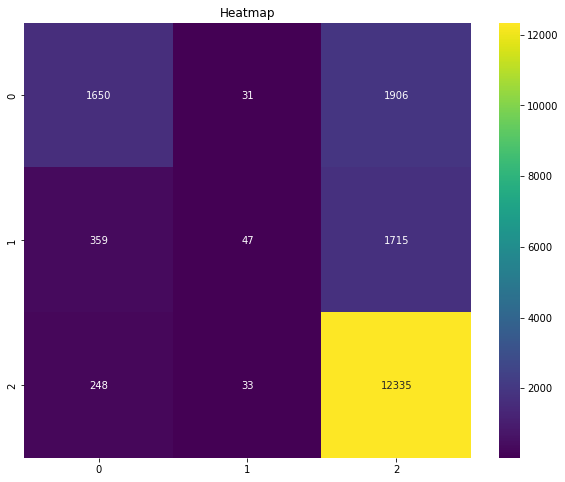

In [ ]:
# Results
Report_Model(y_test, y_pred)

The model has higher accuracy and f1 scores.

**Solving Class Imbalance**

In [ ]:
# Oversampling using SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train_tfid, y_train)

In [ ]:
# Classification
y_pred = XGBoostClass(X_train_smote, X_test_tfid, y_train_smote, y_test, )


Classification Report

              precision    recall  f1-score   support

           0       0.49      0.80      0.61      3587
           1       0.27      0.33      0.30      2121
           2       0.91      0.71      0.80     12616

    accuracy                           0.68     18324
   macro avg       0.56      0.61      0.57     18324
weighted avg       0.75      0.68      0.70     18324





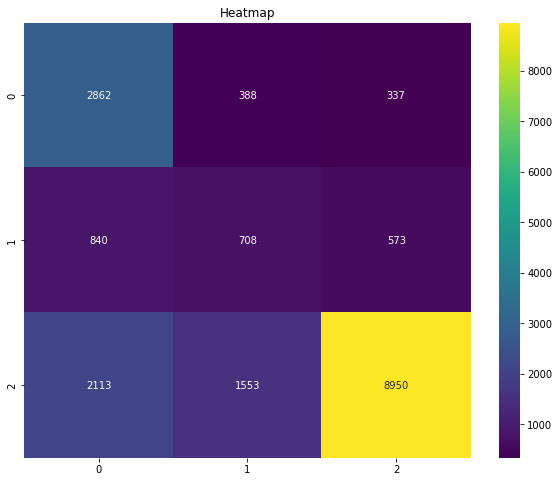

In [ ]:
# Results
Report_Model(y_test, y_pred)

Though the accuracy and precision drops.

**Hyperparameter Tuning**

In [ ]:
# Hyperparameters
params = {'max_depth': [3, 6, 10, 15], 
          'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4], 
          'subsample': np.arange(0.5, 1.0, 0.1), 
          'colsample_bytree': np.arange(0.5, 1.0, 0.1), 
          'colsample_bylevel': np.arange(0.5, 1.0, 0.1), 
          'n_estimators': [100, 250, 500, 750]
              
    }

In [ ]:
# Randomized Search
estimator = xgb.XGBClassifier()
rsearch = RandomizedSearchCV(estimator, params,  scoring= 'average_precision',
                   n_jobs= -1, cv= 5, verbose= 2, 
                   random_state= 100)
rsearch.fit(X_train_tfid, y_train)
rsearch.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'colsample_bylevel': 0.7,
 'colsample_bytree': 0.8999999999999999,
 'learning_rate': 0.01,
 'max_depth': 10,
 'n_estimators': 100,
 'subsample': 0.5}

In [ ]:
# Classifcation function
def XGBoostClassTuned(X_train, X_test, y_train, y_test, max_depth, learning_rate,
                 subsample, colsample_bytree, colsample_bylevel, n_estimators):
  classifier = xgb.XGBClassifier(max_depth = max_depth,
                                 learning_rate = learning_rate, 
                                 subsample = subsample,
                                 colsample_bytree = colsample_bytree, 
                                 colsample_bylevel = colsample_bylevel, 
                                 n_estimators = n_estimators)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  Report_Model(y_test, y_pred)


Classification Report

              precision    recall  f1-score   support

           0       0.69      0.43      0.53      3587
           1       0.47      0.02      0.03      2121
           2       0.77      0.97      0.86     12616

    accuracy                           0.76     18324
   macro avg       0.64      0.47      0.47     18324
weighted avg       0.72      0.76      0.70     18324





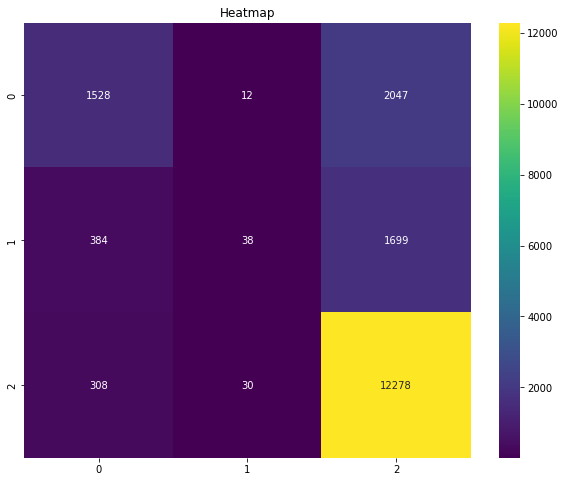

In [ ]:
# Implementing best parameters
y_pred = XGBoostClassTuned(X_train_tfid, X_test_tfid, y_train, y_test, max_depth=10, learning_rate=0.01,
                 subsample=0.5, colsample_bytree=0.8999999999999999, colsample_bylevel=0.7,
                  n_estimators=100)

Perfoemance is slightly below that of the base model.

### BERT Base Model

#### Importing Dependencies

Loading the transformers huggingface library.

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 6.9 MB/s 
     |████████████████████████████████| 101 kB 5.6 MB/s 
     |████████████████████████████████| 596 kB 51.3 MB/s 
     |████████████████████████████████| 6.6 MB 36.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


#### Model

In [ ]:
# Pre-trained tokenizer
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment',
                                          do_lower_case = True)
# Pre-trained BERT model
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

#### Sentiment Analysis

In [ ]:
# Function used to obtain the predicted sentiment scores.
def SentimentScore(text):
  # Tokens
  tokens = tokenizer.encode(text, return_tensors = 'pt', truncation = True, 
                            max_length = 512)
  # Model
  scores = model(tokens)
  # Obtaining the indoces of the logits to obtain the original label.
  return int(torch.argmax(scores.logits)) + 1

In [ ]:
# Loading data.
absa = pd.read_csv('absa.csv')
absa['BERT_Sentiments'] = ''
copy = absa.to_csv('copy.csv')

In [ ]:
# loading saved copy.
copy = pd.read_csv('copy.csv')

In [ ]:
# Preview
copy.head()

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  overall  verified   reviewTime  \
0           0             0               0        5      True  09 25, 2015   
1           1             1               1        5      True  09 25, 2015   
2           2             2               2        5      True  02 15, 2017   
3           3             3               3        5      True  02 15, 2017   
4           4             4               4        5      True  07 26, 2016   

       reviewerID        asin       reviewerName  \
0  A3DDWDH9PX2YX2  B00J8WZBEG          Sonja Lau   
1  A3DDWDH9PX2YX2  B00J8WZBEG          Sonja Lau   
2  A29HLOUW0NS0EH  B01AQW1XI4  Patricia R. Erwin   
3  A29HLOUW0NS0EH  B01AQW1XI4  Patricia R. Erwin   
4  A2JQ5SR88NQX8P  B01AQW1XI4         N. Rosario   

                                          reviewText  ... unixReviewTime  \
0                      Simply and elegant!  Love it!  ...     1443139200   
1                      Simply and elegant!  Love it!  ...     1443139200   
2                                Just what I wanted.  ...     1487116800   
3                                Just what I wanted.  ...     1487116800   
4  These shoelaces look very nice, they're at a g...  ...     1469491200   

         Item Rating   Timestamp    brand  \
0  7106116521    2.0  1411862400  Unknown   
1  B00J8WZBEG    5.0  1443139200  Unknown   
2  7106116521    5.0  1405728000     TOFL   
3  B01AQW1XI4    5.0  1487116800     TOFL   
4  B00062NHH0    5.0  1426032000     TOFL   

                                       cleanedReview  \
0                        Simply and elegant Love it    
1                        Simply and elegant Love it    
2                                Just what I wanted    
3                                Just what I wanted    
4  These shoelaces look very nice they re at a go...   

                                 cleanedReviewTagged  \
0  [('Simply', 'n'), ('elegant', 'a'), ('Love', '...   
1  [('Simply', 'n'), ('elegant', 'a'), ('Love', '...   
2                                  [('wanted', 'v')]   
3                                  [('wanted', 'v')]   
4  [('shoelaces', 'n'), ('look', 'v'), ('nice', '...   

                         cleanedReviewLemmatized  \
0                            Simply elegant Love   
1                            Simply elegant Love   
2                                           want   
3                                           want   
4    shoelace look nice good price fast shipping   

                                                ABSA BERT_Sentiments  
0  {'aspect': 'Love', 'description': 'Simply eleg...             NaN  
1  {'aspect': 'Love', 'description': 'Simply eleg...             NaN  
2                  {'aspect': '', 'description': ''}             NaN  
3                  {'aspect': '', 'description': ''}             NaN  
4      {'aspect': 'shipping', 'description': 'fast'}             NaN  

[5 rows x 21 columns]

The modelling processing is coputationally expensive therefore the model will be sampled to reduce exectution time.

In [ ]:
# Sampling 1% of the data.
stratified_copy = copy.groupby('overall', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.01))
# Reseting index.
stratified_copy = stratified_copy.iloc[:, 3:]
stratified_copy.reset_index(drop = True, inplace = True)
stratified_copy.head()

overall  verified   reviewTime      reviewerID        asin  \
0        1      True  11 15, 2013  A248WFGHOT6K3R  B00FJMW2R8   
1        1      True   01 8, 2011  A1FOTPDKZDVGJ3  B003O5UN00   
2        1      True  06 23, 2015  A3MUYTIR2WIAVS  B00M1B0ZII   
3        1      True  05 31, 2015  A3MCX1JZVXZCDL  B00HVTJEGY   
4        1      True   10 6, 2016  A18OP1NUFHXJSG  B00WUC8WGU   

      reviewerName                                         reviewText  \
0  mariam alsalman  I receive it in bad quality , the magnet and t...   
1            marie  when i first saw this item i thought it was re...   
2     Susan Perley  The worst product I have gotten. Sad and I can...   
3   brenda collins  The purse looked so dreadfull. I wouldn't reco...   
4   Laura krencius  Was in hospital when delivered and off and on ...   

                                 summary  unixReviewTime        Item  Rating  \
0                            Bad quality      1384473600  B00FJMW2R8     1.0   
1                           cheaply made      1294444800  B003O5UN00     1.0   
2                               One Star      1435017600  B00M1B0ZII     1.0   
3  I wouldn't recommend anyone to buy it      1433030400  B00HVTJEGY     1.0   
4  Dress is beautiful here not in person      1475712000  B00WUC8WGU     1.0   

    Timestamp           brand  \
0  1384473600           Coach   
1  1294444800  Lucien Piccard   
2  1435017600     ACEFAST INC   
3  1433030400         BAGLAND   
4  1475712000     Felaladress   

                                       cleanedReview  \
0  I receive it in bad quality the magnet and the...   
1  when i first saw this item i thought it was re...   
2  The worst product I have gotten Sad and I can ...   
3  The purse looked so dreadfull I wouldn t recom...   
4  Was in hospital when delivered and off and on ...   

                                 cleanedReviewTagged  \
0  [('receive', 'v'), ('bad', 'a'), ('quality', '...   
1  [('first', 'r'), ('saw', 'v'), ('item', 'n'), ...   
2  [('worst', 'a'), ('product', 'n'), ('gotten', ...   
3  [('purse', 'n'), ('looked', 'v'), ('dreadfull'...   
4  [('hospital', 'n'), ('delivered', 'v'), ('til'...   

                             cleanedReviewLemmatized  \
0    receive bad quality magnet hing break proper...   
1    first saw item think really sharp cheaply ma...   
2               bad product get Sad return Go figure   
3    purse look dreadfull recommend anyone buy ev...   
4    hospital deliver til Ordered large size poor...   

                                                ABSA  BERT_Sentiments  
0        {'aspect': 'return', 'description': 'know'}              NaN  
1  {'aspect': 'week', 'description': 'really sharp'}              NaN  
2         {'aspect': 'figure', 'description': 'bad'}              NaN  
3         {'aspect': 'purse', 'description': 'good'}              NaN  
4    {'aspect': 'alot', 'description': 'advertised'}              NaN

In [ ]:
# Resulting shape of the sampled data.
stratified_copy.shape

(9163, 18)

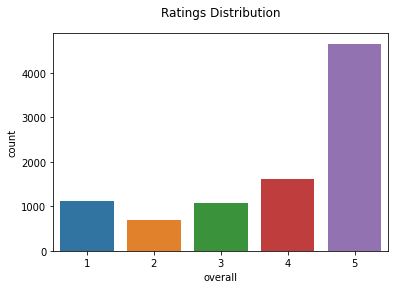

In [ ]:
# Preview of ratings distribution
sns.countplot(data = stratified_copy, x = 'overall')
plt.title('Ratings Distribution', y = 1.05)
plt.show()

The original distribution is mainatined.

In [ ]:
# Obtaining sentiments scores.
stratified_copy['BERT_Sentiments'] = ''
row = 0
for text in stratified_copy['reviewText']:
  stratified_copy.loc[row, 'BERT_Sentiments'] = SentimentScore(text)
  row += 1

In [ ]:
# Sving result to a csv file to re-use.
stratified_copy_df = copy.to_csv('bert_stratified.csv')

In [ ]:
# Loading the saved data.
bt = pd.read_csv('bert.csv')
bt.head()

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  Unnamed: 0.1.1.1  overall  \
0           0             0               0                 0        5   
1           1             1               1                 1        5   
2           2             2               2                 2        5   
3           3             3               3                 3        5   
4           4             4               4                 4        5   

   verified   reviewTime      reviewerID        asin       reviewerName  ...  \
0      True  09 25, 2015  A3DDWDH9PX2YX2  B00J8WZBEG          Sonja Lau  ...   
1      True  09 25, 2015  A3DDWDH9PX2YX2  B00J8WZBEG          Sonja Lau  ...   
2      True  02 15, 2017  A29HLOUW0NS0EH  B01AQW1XI4  Patricia R. Erwin  ...   
3      True  02 15, 2017  A29HLOUW0NS0EH  B01AQW1XI4  Patricia R. Erwin  ...   
4      True  07 26, 2016  A2JQ5SR88NQX8P  B01AQW1XI4         N. Rosario  ...   

  unixReviewTime        Item  Rating   Timestamp    brand  \
0     1443139200  7106116521     2.0  1411862400  Unknown   
1     1443139200  B00J8WZBEG     5.0  1443139200  Unknown   
2     1487116800  7106116521     5.0  1405728000     TOFL   
3     1487116800  B01AQW1XI4     5.0  1487116800     TOFL   
4     1469491200  B00062NHH0     5.0  1426032000     TOFL   

                                       cleanedReview  \
0                        Simply and elegant Love it    
1                        Simply and elegant Love it    
2                                Just what I wanted    
3                                Just what I wanted    
4  These shoelaces look very nice they re at a go...   

                                 cleanedReviewTagged  \
0  [('Simply', 'n'), ('elegant', 'a'), ('Love', '...   
1  [('Simply', 'n'), ('elegant', 'a'), ('Love', '...   
2                                  [('wanted', 'v')]   
3                                  [('wanted', 'v')]   
4  [('shoelaces', 'n'), ('look', 'v'), ('nice', '...   

                         cleanedReviewLemmatized  \
0                            Simply elegant Love   
1                            Simply elegant Love   
2                                           want   
3                                           want   
4    shoelace look nice good price fast shipping   

                                                ABSA BERT_Sentiments  
0  {'aspect': 'Love', 'description': 'Simply eleg...             5.0  
1  {'aspect': 'Love', 'description': 'Simply eleg...             5.0  
2                  {'aspect': '', 'description': ''}             5.0  
3                  {'aspect': '', 'description': ''}             5.0  
4      {'aspect': 'shipping', 'description': 'fast'}             5.0  

[5 rows x 22 columns]

In [ ]:
# The data wasn't run to completion due to the extremely long execution time.
# Therefore, rows with missing predictions will be dropped.
bt_drp = bt.dropna()


Classification Report

              precision    recall  f1-score   support

           1       0.60      0.55      0.58       217
           2       0.27      0.50      0.35       156
           3       0.40      0.54      0.46       331
           4       0.32      0.50      0.39       631
           5       0.95      0.81      0.87      4030

    accuracy                           0.74      5365
   macro avg       0.51      0.58      0.53      5365
weighted avg       0.80      0.74      0.76      5365





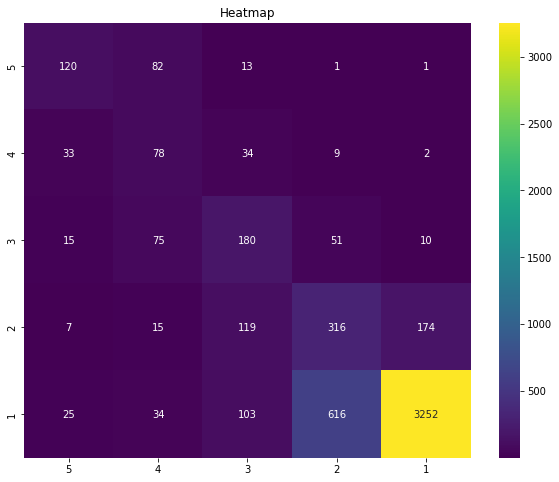

In [ ]:
# Prediction Results
Report('overall', 'BERT_Sentiments', bt_drp)

A higher accuracy and f1 scores is attained.

In [ ]:
# Combining sentiments function.
def SentimentGrouping(column1, column2, data):
  # Negative sentiment
  data.loc[data[column1] < 3, column2] = 0
  # Neutral sentiment
  data.loc[data[column1] == 3, column2] = 1
  # Positive sentiment
  data.loc[data[column1] > 3, column2] = 2



In [ ]:
# Rating sentiments
bt_drp['grouped_sentiments'] = 0
SentimentGrouping('overall', 'grouped_sentiments', bt_drp)
# BERT sentiments
bt_drp['bert_grouped_sentiments'] = 0
SentimentGrouping('BERT_Sentiments', 'bert_grouped_sentiments', bt_drp)


In [ ]:
# Previewing changes
bt_drp.head()

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  Unnamed: 0.1.1.1  overall  \
0           0             0               0                 0        5   
1           1             1               1                 1        5   
2           2             2               2                 2        5   
3           3             3               3                 3        5   
4           4             4               4                 4        5   

   verified   reviewTime      reviewerID        asin       reviewerName  ...  \
0      True  09 25, 2015  A3DDWDH9PX2YX2  B00J8WZBEG          Sonja Lau  ...   
1      True  09 25, 2015  A3DDWDH9PX2YX2  B00J8WZBEG          Sonja Lau  ...   
2      True  02 15, 2017  A29HLOUW0NS0EH  B01AQW1XI4  Patricia R. Erwin  ...   
3      True  02 15, 2017  A29HLOUW0NS0EH  B01AQW1XI4  Patricia R. Erwin  ...   
4      True  07 26, 2016  A2JQ5SR88NQX8P  B01AQW1XI4         N. Rosario  ...   

  Rating   Timestamp    brand  \
0    2.0  1411862400  Unknown   
1    5.0  1443139200  Unknown   
2    5.0  1405728000     TOFL   
3    5.0  1487116800     TOFL   
4    5.0  1426032000     TOFL   

                                       cleanedReview  \
0                        Simply and elegant Love it    
1                        Simply and elegant Love it    
2                                Just what I wanted    
3                                Just what I wanted    
4  These shoelaces look very nice they re at a go...   

                                 cleanedReviewTagged  \
0  [('Simply', 'n'), ('elegant', 'a'), ('Love', '...   
1  [('Simply', 'n'), ('elegant', 'a'), ('Love', '...   
2                                  [('wanted', 'v')]   
3                                  [('wanted', 'v')]   
4  [('shoelaces', 'n'), ('look', 'v'), ('nice', '...   

                         cleanedReviewLemmatized  \
0                            Simply elegant Love   
1                            Simply elegant Love   
2                                           want   
3                                           want   
4    shoelace look nice good price fast shipping   

                                                ABSA BERT_Sentiments  \
0  {'aspect': 'Love', 'description': 'Simply eleg...             5.0   
1  {'aspect': 'Love', 'description': 'Simply eleg...             5.0   
2                  {'aspect': '', 'description': ''}             5.0   
3                  {'aspect': '', 'description': ''}             5.0   
4      {'aspect': 'shipping', 'description': 'fast'}             5.0   

  grouped_sentiments bert_grouped_sentiments  
0                  2                       2  
1                  2                       2  
2                  2                       2  
3                  2                       2  
4                  2                       2  

[5 rows x 24 columns]


Classification Report

              precision    recall  f1-score   support

           0       0.65      0.84      0.73       373
           1       0.40      0.54      0.46       331
           2       0.98      0.93      0.96      4661

    accuracy                           0.90      5365
   macro avg       0.68      0.77      0.72      5365
weighted avg       0.92      0.90      0.91      5365





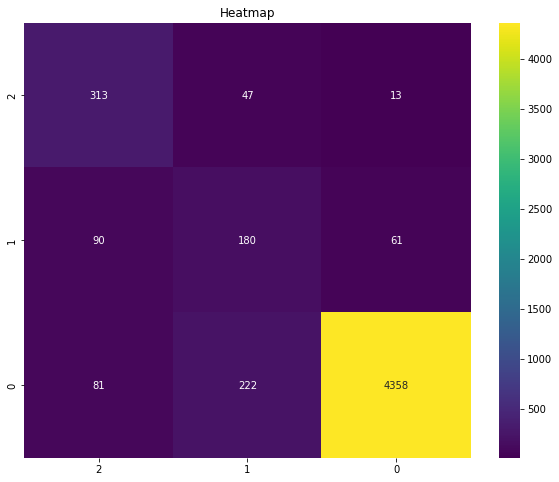

In [ ]:
# Grouped sentiment prediction results.
Report('grouped_sentiments', 'bert_grouped_sentiments', bt_drp)

The accuracy and prediction scores increase greatly.

#### Fine-Tuning the BERT Model

##### Tokenization

In [ ]:
# Tokenizer
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment', do_lower_case = True)
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment', num_labels=5, problem_type="multi_label_classification")

Downloading:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/953 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/851k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/638M [00:00<?, ?B/s]

BERT Pre-trained model will be used.

##### Training Hyperparameters

Installing the evaluate library from huggingface to access metrics.

In [ ]:
# Evaluate library
!pip install evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 140 kB 11.8 MB/s 
     |████████████████████████████████| 362 kB 12.4 MB/s 
     |████████████████████████████████| 212 kB 15.6 MB/s 
     |████████████████████████████████| 1.1 MB 15.6 MB/s 
     |████████████████████████████████| 127 kB 31.7 MB/s 
     |████████████████████████████████| 271 kB 37.7 MB/s 
     |████████████████████████████████| 144 kB 42.4 MB/s 
     |████████████████████████████████| 94 kB 2.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but yo

##### Train-Test-Split

In [ ]:
# Importing cleaned dataset
copy = pd.read_csv('copy.csv')

Due to the large computational and time cost, the revie3ws dataset will be sampled.

In [ ]:
# Sampling 1% of the data
stratified_copy = copy.groupby('overall', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.01, random_state = 100))
# Reseting the index
stratified_copy = stratified_copy.iloc[:, 3:]
stratified_copy.reset_index(drop = True, inplace = True)
stratified_copy.head()

overall  verified   reviewTime      reviewerID        asin  \
0        1      True  11 30, 2017  A2YWCAUWAIBEXU  B01HAZRK5K   
1        1      True  03 16, 2016   AVX6SL5N3F7FI  B00IJF8OQ0   
2        1      True   05 1, 2016  A1Q6LL6C7A45XN  B01CDPKD4C   
3        1      True  03 24, 2017  A18RKSVZ5S1OQX  B017IOPIK2   
4        1      True  03 20, 2018  A1QWH3ZHDRU9WE  B00RLSCLJM   

      reviewerName                                         reviewText  \
0  Amazon Customer                                Not what I expected   
1           gary r                       Not a true fit  poor quality   
2        ivy walls  I love the style but not true to size at all. ...   
3            steve  I gave this belt a star based on the fact that...   
4           Mick61  The item I received is nothing like the pictur...   

                                        summary  unixReviewTime        Item  \
0                                        Meh...      1512000000  B01HAZRK5K   
1                                      One Star      1458086400  B00IJF8OQ0   
2  I love the style but not true to size at all      1462060800  B01481TSOU   
3                               A one time belt      1490313600  B017IOPIK2   
4                   Very Thin and Cheap Looking      1521504000  B00RLSCLJM   

   Rating   Timestamp              brand  \
0     1.0  1512000000       MUSCLE ALIVE   
1     1.0  1458086400     Smith & Wesson   
2     5.0  1456963200         Binmer(TM)   
3     1.0  1490313600             Maikun   
4     1.0  1521504000  MJ Metals Jewelry   

                                       cleanedReview  \
0                                Not what I expected   
1                        Not a true fit poor quality   
2  I love the style but not true to size at all N...   
3  I gave this belt a star based on the fact that...   
4  The item I received is nothing like the pictur...   

                                 cleanedReviewTagged  \
0                                [('expected', 'v')]   
1  [('true', 'a'), ('fit', 'n'), ('poor', 'a'), (...   
2  [('love', 'v'), ('style', 'n'), ('true', 'a'),...   
3  [('gave', 'v'), ('belt', 'n'), ('star', 'n'), ...   
4  [('item', 'n'), ('received', 'v'), ('nothing',...   

                             cleanedReviewLemmatized  \
0                                             expect   
1                              true fit poor quality   
2    love style true size size look picture year ...   
3    give belt star base fact arrive allow Amazon...   
4    item receive nothing like picture metal thin...   

                                               ABSA  BERT_Sentiments  
0                 {'aspect': '', 'description': ''}              NaN  
1      {'aspect': 'quality', 'description': 'poor'}              NaN  
2          {'aspect': 'wear', 'description': 'sad'}              NaN  
3        {'aspect': 'time', 'description': 'worth'}              NaN  
4  {'aspect': 'appearance', 'description': 'cheap'}              NaN

In [ ]:
# Appending star and stars to the ratings to match the BERT model format.
stratified_copy['overall'] = stratified_copy['overall'].astype('str')
stratified_copy.loc[stratified_copy['overall'] == '1', 'overall'] = '1 Star'
stratified_copy.loc[stratified_copy['overall'] == '2', 'overall'] = '2 Stars'
stratified_copy.loc[stratified_copy['overall'] == '3', 'overall'] = '3 Stars'
stratified_copy.loc[stratified_copy['overall'] == '4', 'overall'] = '4 Stars'
stratified_copy.loc[stratified_copy['overall'] == '5', 'overall'] = '5 Stars'


In [ ]:
# Lable Encoding the ratings column.
le = LabelEncoder()
stratified_copy['overall'] = le.fit_transform(stratified_copy['overall'])
stratified_copy.head()


overall  verified   reviewTime      reviewerID        asin  \
0        0      True  11 30, 2017  A2YWCAUWAIBEXU  B01HAZRK5K   
1        0      True  03 16, 2016   AVX6SL5N3F7FI  B00IJF8OQ0   
2        0      True   05 1, 2016  A1Q6LL6C7A45XN  B01CDPKD4C   
3        0      True  03 24, 2017  A18RKSVZ5S1OQX  B017IOPIK2   
4        0      True  03 20, 2018  A1QWH3ZHDRU9WE  B00RLSCLJM   

      reviewerName                                         reviewText  \
0  Amazon Customer                                Not what I expected   
1           gary r                       Not a true fit  poor quality   
2        ivy walls  I love the style but not true to size at all. ...   
3            steve  I gave this belt a star based on the fact that...   
4           Mick61  The item I received is nothing like the pictur...   

                                        summary  unixReviewTime        Item  \
0                                        Meh...      1512000000  B01HAZRK5K   
1                                      One Star      1458086400  B00IJF8OQ0   
2  I love the style but not true to size at all      1462060800  B01481TSOU   
3                               A one time belt      1490313600  B017IOPIK2   
4                   Very Thin and Cheap Looking      1521504000  B00RLSCLJM   

   Rating   Timestamp              brand  \
0     1.0  1512000000       MUSCLE ALIVE   
1     1.0  1458086400     Smith & Wesson   
2     5.0  1456963200         Binmer(TM)   
3     1.0  1490313600             Maikun   
4     1.0  1521504000  MJ Metals Jewelry   

                                       cleanedReview  \
0                                Not what I expected   
1                        Not a true fit poor quality   
2  I love the style but not true to size at all N...   
3  I gave this belt a star based on the fact that...   
4  The item I received is nothing like the pictur...   

                                 cleanedReviewTagged  \
0                                [('expected', 'v')]   
1  [('true', 'a'), ('fit', 'n'), ('poor', 'a'), (...   
2  [('love', 'v'), ('style', 'n'), ('true', 'a'),...   
3  [('gave', 'v'), ('belt', 'n'), ('star', 'n'), ...   
4  [('item', 'n'), ('received', 'v'), ('nothing',...   

                             cleanedReviewLemmatized  \
0                                             expect   
1                              true fit poor quality   
2    love style true size size look picture year ...   
3    give belt star base fact arrive allow Amazon...   
4    item receive nothing like picture metal thin...   

                                               ABSA  BERT_Sentiments  
0                 {'aspect': '', 'description': ''}              NaN  
1      {'aspect': 'quality', 'description': 'poor'}              NaN  
2          {'aspect': 'wear', 'description': 'sad'}              NaN  
3        {'aspect': 'time', 'description': 'worth'}              NaN  
4  {'aspect': 'appearance', 'description': 'cheap'}              NaN

In [ ]:
# Ratings
print(le.classes_)

['1 Star' '2 Stars' '3 Stars' '4 Stars' '5 Stars']


In [ ]:
# Preprocess data
X = list(stratified_copy["reviewText"]) # Original text
y = list(stratified_copy["overall"]) # Ratings
X1 = list(stratified_copy["cleanedReviewLemmatized"]) # Lemmatized text

In [ ]:
# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state = 100)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2,
                                                        random_state = 100)

##### Creating a Pytorch dataset

In [ ]:
# Class used to create a Pytorch dataset
class DataLoader(torch.utils.data.Dataset):
  # Constructor used to initialize and object's state.
    def __init__(self, sentences=None, labels=None):
        self.sentences = sentences # Review text
        self.labels = labels # Ratings
        # Tokenizer
        self.tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment',
                                                       do_lower_case = True)
        
        if bool(sentences):
          # Tokenizing reviews
            self.encodings = self.tokenizer(self.sentences,
                                            truncation = True,
                                            padding = True,
                                            max_length = 512) 

    # Returns the value/data of the specified storage object item.    
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        
        if self.labels == None:
            item['labels'] = None
        else:
            item['labels'] = torch.tensor(self.labels[idx])
        return item

    # length of the data.    
    def __len__(self):
        return len(self.sentences)
    
    
    def encode(self, x):
      # Tokenization
        return self.tokenizer(x, return_tensors = 'pt',
                              max_length = 512, , 
                              truncation = True, 
                              padding = 'max_length')

In [ ]:
# Creating pytorch datsets
  # Orginal text datasets.
train_dataset = DataLoader(X_train, y_train)
test_dataset = DataLoader(X_test, y_test)
  # Lemmatized text datasets.
train_dataset1 = DataLoader(X1_train, y1_train)
test_dataset1 = DataLoader(X1_train, y1_train)

loading configuration file https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/d9226eeac7b8b96d83ebc327cdd670490866d8c999505c1f83b6ef206ccb1604.a34960b447312b0727cb670d710444fcb41a6156eddcba062a19b3fc05d95251
Model config BertConfig {
  "_name_or_path": "nlptown/bert-base-multilingual-uncased-sentiment",
  "_num_labels": 5,
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "finetuning_task": "sentiment-analysis",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "1 star",
    "1": "2 stars",
    "2": "3 stars",
    "3": "4 stars",
    "4": "5 stars"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "1 star": 0,
    "2 stars": 1,
    "3 stars": 2,
    "4 stars": 3,
    "5 stars": 4
  },
  "layer_norm

##### Metrics

In [ ]:
# F1 score and accuracy
f1 = load('f1')
accuracy = load('accuracy')

In [ ]:
# Function used to compute the performance metrics.
def compute_metrics(eval_pred):
    metrics_dict = {}
    predictions, labels = eval_pred
    # Logits predictions
    predictions = np.argmax(predictions, axis=1)
    # Weighted F1 score
    metrics_dict.update(f1.compute(predictions = predictions, references = labels, average = 'micro'))
    # Accuracy
    metrics_dict.update(accuracy.compute(predictions = predictions, references = labels))
    return metrics_dict

In [ ]:
#-----------Fine-Tuning BERT Model----------------
# Customize training and feature complete training
from transformers import TrainingArguments, Trainer 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Evaluation metric library
from evaluate import load
# Configuration class for models
from transformers import AutoConfig

In [ ]:
# Dictionary that maps class ids to their respective labels.
id2label = {idx:label for idx, label in enumerate(le.classes_)}
# Dictionary that maps class labels to their respective ids.
label2id = {label:idx for idx, label in enumerate(le.classes_)}
# Model configuration class
config = AutoConfig.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment',
                                    num_labels = 5,
                                    id2label = id2label,
                                    label2id = label2id)
# BERT classification model
model = AutoModelForSequenceClassification.from_config(config)

loading configuration file https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/d9226eeac7b8b96d83ebc327cdd670490866d8c999505c1f83b6ef206ccb1604.a34960b447312b0727cb670d710444fcb41a6156eddcba062a19b3fc05d95251
Model config BertConfig {
  "_name_or_path": "nlptown/bert-base-multilingual-uncased-sentiment",
  "_num_labels": 5,
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "finetuning_task": "sentiment-analysis",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "1 Star",
    "1": "2 Stars",
    "2": "3 Stars",
    "3": "4 Stars",
    "4": "5 Stars"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "1 Star": 0,
    "2 Stars": 1,
    "3 Stars": 2,
    "4 Stars": 3,
    "5 Stars": 4
  },
  "layer_norm

In [ ]:
# Setting training arguments
training_args = TrainingArguments(
    output_dir='train-results', 
    evaluation_strategy = 'steps', 
    num_train_epochs=5,                                   
    load_best_model_at_end=True, 
    metric_for_best_model="f1")

using `logging_steps` to initialize `eval_steps` to 500
PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


##### Training, Evaluation and Prediction

In [ ]:
# Original Text trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics)

In [ ]:
# Lemmatized text trainer
trainer1 = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset1,
    eval_dataset=test_dataset1,
    compute_metrics=compute_metrics)

In [ ]:
# Original text model training
trainer.train()

***** Running training *****
  Num examples = 7330
  Num Epochs = 5
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 4585


***** Running Evaluation *****
  Num examples = 1833
  Batch size = 8
Saving model checkpoint to train-results/checkpoint-500
Configuration saved in train-results/checkpoint-500/config.json
Model weights saved in train-results/checkpoint-500/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 1833
  Batch size = 8
Saving model checkpoint to train-results/checkpoint-1000
Configuration saved in train-results/checkpoint-1000/config.json
Model weights saved in train-results/checkpoint-1000/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 1833
  Batch size = 8
Saving model checkpoint to train-results/checkpoint-1500
Configuration saved in train-results/checkpoint-1500/config.json
Model weights saved in train-results/checkpoint-1500/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 1833
  Batch size = 8
Saving model checkpoint to train-results/checkpoint-2000
Configuration saved in train-results/checkpoint-2000/config.json
Model weights saved in

TrainOutput(global_step=4585, training_loss=0.9579183081374174, metrics={'train_runtime': 4310.3889, 'train_samples_per_second': 8.503, 'train_steps_per_second': 1.064, 'total_flos': 9643279921305600.0, 'train_loss': 0.9579183081374174, 'epoch': 5.0})

In [ ]:
# Lemmatized text model training
trainer1.train()

***** Running training *****
  Num examples = 7330
  Num Epochs = 5
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 4585


***** Running Evaluation *****
  Num examples = 7330
  Batch size = 8
Saving model checkpoint to train-results/checkpoint-500
Configuration saved in train-results/checkpoint-500/config.json
Model weights saved in train-results/checkpoint-500/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 7330
  Batch size = 8
Saving model checkpoint to train-results/checkpoint-1000
Configuration saved in train-results/checkpoint-1000/config.json
Model weights saved in train-results/checkpoint-1000/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 7330
  Batch size = 8
Saving model checkpoint to train-results/checkpoint-1500
Configuration saved in train-results/checkpoint-1500/config.json
Model weights saved in train-results/checkpoint-1500/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 7330
  Batch size = 8
Saving model checkpoint to train-results/checkpoint-2000
Configuration saved in train-results/checkpoint-2000/config.json
Model weights saved in

TrainOutput(global_step=4585, training_loss=1.1236633866537877, metrics={'train_runtime': 4645.7574, 'train_samples_per_second': 7.889, 'train_steps_per_second': 0.987, 'total_flos': 7213625409882900.0, 'train_loss': 1.1236633866537877, 'epoch': 5.0})

In [ ]:
# Saving the models
trainer.save_model('bert_model')
trainer1.save_model('bert_model1')

Saving model checkpoint to bert_model
Configuration saved in bert_model/config.json
Model weights saved in bert_model/pytorch_model.bin
Saving model checkpoint to bert_model1
Configuration saved in bert_model1/config.json
Model weights saved in bert_model1/pytorch_model.bin


**Creating the test sets**

In [ ]:
# Sampling to obtain the test set.
stratified_train = copy.groupby('overall', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.01, random_state = 100))
indices = stratified_train.index

In [ ]:
# Finding indices not used for model training.
all = np.arange(copy.shape[0])
target = set(all) - set(indices)

In [ ]:
# Creating a test set
stratified_test = copy.iloc[list(target)]
stratified_test = stratified_test.groupby('overall', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.001, random_state = 100))

In [ ]:
# Test set shape
stratified_test.shape

(908, 21)

In [ ]:
# Appending star and stars to the ratings
stratified_test['overall'] = stratified_test['overall'].astype('str')
stratified_test.loc[stratified_test['overall'] == '1', 'overall'] = '1 Star'
stratified_test.loc[stratified_test['overall'] == '2', 'overall'] = '2 Stars'
stratified_test.loc[stratified_test['overall'] == '3', 'overall'] = '3 Stars'
stratified_test.loc[stratified_test['overall'] == '4', 'overall'] = '4 Stars'
stratified_test.loc[stratified_test['overall'] == '5', 'overall'] = '5 Stars'


In [ ]:
# Lable Encoding
le = LabelEncoder()
stratified_test['overall'] = le.fit_transform(stratified_test['overall'])

In [ ]:
# Preprocessing the  data.
X2 = list(stratified_test["reviewText"])
y2 = list(stratified_test["overall"])
X3 = list(stratified_test["cleanedReviewLemmatized"])

In [ ]:
# Coverting the data to pytorch datasets.
test_set1 = DataLoader(X2, y2)
test_set2 = DataLoader(X3, y2)



loading configuration file https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/d9226eeac7b8b96d83ebc327cdd670490866d8c999505c1f83b6ef206ccb1604.a34960b447312b0727cb670d710444fcb41a6156eddcba062a19b3fc05d95251
Model config BertConfig {
  "_name_or_path": "nlptown/bert-base-multilingual-uncased-sentiment",
  "_num_labels": 5,
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "finetuning_task": "sentiment-analysis",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "1 star",
    "1": "2 stars",
    "2": "3 stars",
    "3": "4 stars",
    "4": "5 stars"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "1 star": 0,
    "2 stars": 1,
    "3 stars": 2,
    "4 stars": 3,
    "5 stars": 4
  },
  "layer_norm

##### Predictions

**Original Text Trained Model**

In [ ]:
# Original text model.
y_pred_original = trainer.predict(test_set1)

***** Running Prediction *****
  Num examples = 908
  Batch size = 8


In [ ]:
# Prediction scores.
y_pred_original.predictions

array([[ 0.03301755,  0.3373329 ,  0.4454424 ,  0.14804147, -0.71724856],
       [ 2.120316  ,  0.86762375,  0.18067478, -1.257852  , -1.475791  ],
       [ 2.1203237 ,  0.86762416,  0.1806726 , -1.2578591 , -1.475792  ],
       ...,
       [-1.5442907 , -1.0130814 ,  0.01553502,  1.0929554 ,  1.9494044 ],
       [-1.5443066 , -1.0130934 ,  0.01552838,  1.092957  ,  1.9494305 ],
       [-1.5443034 , -1.013091  ,  0.01552956,  1.0929569 ,  1.9494256 ]],
      dtype=float32)

In [ ]:
# Ground truth label ids.
np.unique(y_pred_original.label_ids)

array([0, 1, 2, 3, 4])

In [ ]:
# Saving results to the dataset.
stratified_test['original_text_sentiments'] = y_pred_original.label_ids
stratified_test['original_text_sentiments'] = stratified_test['original_text_sentiments'] + 1

In [ ]:
# Metrics
y_pred_original.metrics

{'test_accuracy': 0.6002202643171806,
 'test_f1': 0.37806063308156157,
 'test_loss': 1.0452231168746948,
 'test_runtime': 30.8688,
 'test_samples_per_second': 29.415,
 'test_steps_per_second': 3.693}

The F1 score is extremetly low.

**Lemmatized Text Trained Model**

In [ ]:
# Lemmatized text model
y_pred_lemmatized = trainer1.predict(test_set1)

***** Running Prediction *****
  Num examples = 908
  Batch size = 8


In [ ]:
# Prediction scores
y_pred_lemmatized.predictions

array([[ 0.03301755,  0.3373329 ,  0.4454424 ,  0.14804147, -0.71724856],
       [ 2.120316  ,  0.86762375,  0.18067478, -1.257852  , -1.475791  ],
       [ 2.1203237 ,  0.86762416,  0.1806726 , -1.2578591 , -1.475792  ],
       ...,
       [-1.5442907 , -1.0130814 ,  0.01553502,  1.0929554 ,  1.9494044 ],
       [-1.5443066 , -1.0130934 ,  0.01552838,  1.092957  ,  1.9494305 ],
       [-1.5443034 , -1.013091  ,  0.01552956,  1.0929569 ,  1.9494256 ]],
      dtype=float32)

In [ ]:
# Ground truth label ids
np.unique(y_pred_lemmatized.label_ids)

array([0, 1, 2, 3, 4])

In [ ]:
# Saving results to the dataset
stratified_test['lemmatized_text_sentiments'] = y_pred_lemmatized.label_ids
stratified_test['lemmatized_text_sentiments'] = stratified_test['lemmatized_text_sentiments'] + 1

In [ ]:
# Metrics
y_pred_lemmatized.metrics

{'test_accuracy': 0.6002202643171806,
 'test_f1': 0.37806063308156157,
 'test_loss': 1.0452231168746948,
 'test_runtime': 30.5572,
 'test_samples_per_second': 29.715,
 'test_steps_per_second': 3.731}

The model performance does not improve. Therefore, the orginal pre-trained model will be used.

### Summary

1. Sampling was done as the training was computationally expensive.
2. Using a pre-trained BERT model provides better prediction results. This can be attricuted to the fact that the BERT model is non-directional and considers the entire context of the word before predictions are generated. 
3. XGBoost has the second best performance in terms of modelling results. Furthermore, the model is efficient in terms of speed and performance. The model was created after implementig TFIDVectorizer, which only considers word frequency when converting text to integer vecors.
4. Attempts to improve model performace by oversampling and hyperparameter tuning did not improve model performance.
5. VADER and TextBlob have library predictions have the poorest results. This coild be due to the limitation of the Rule-Based approach. Furthermore, VADER has a slighlty better performace as TextBlob tends to miscassify negative sentiments, especially words that are not next to scored words (in terms from which sentiment cannot be derived).